<h3 align="center">BÀI KIỂM TRA GIỮA KỲ</h3>
  <p align="center">
    Học phần: Khoa học dữ liệu
  </p>
</p>

Nhóm sinh viên thực hiện
| Họ và tên     | MSSV | Lớp SH| Lớp HP|
---------|---------|---------|-----------|
| Cao Kiều Văn Mạnh    | 102200270      | 20TCLC_KHDL | 20.15 |
| Trần Đình Minh Khoa | 102200265      |20TCLC_KHDL | 20.15 |

# **Bộ dữ liệu**
---

### **Netflix Data: Cleaning, Analysis and Visualization**
- Xem và tải dữ liệu tại đây: https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization?resource=download
- Mô tả: Netflix Data: Cleaning, Analysis and Visualization là bộ dữ liệu được thu thập từ trang web Netflix. Bộ dữ liệu này bao gồm thông tin về các bộ phim, chương trình truyền hình được phát trên Netflix. Bộ dữ liệu này bao gồm các cột như tên phim, năm phát hành, thời lượng phim, quốc gia, thể loại,... 
- Mục đích: bộ dữ liệu này được sử dụng để phân tích, khám phá và trực quan hóa dữ liệu.

# **Giới thiệu chung**
---

## **Notebook này bao gồm 4 phần chính là:**

1. Kiểm tra và làm sạch dữ liệu
2. Khai phá dữ liệu
3. Trực quan hóa dữ liệu
4. Kết luận chung

# **1. Kiểm tra và làm sạch dữ liệu**
---

## **Import các thư viện cần thiết và đọc dữ liệu**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Đọc dữ liệu
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## **Kiểm tra các thông số của dữ liệu**

In [3]:
#Kiểm tra kích thước của bộ dữ liệu
df.shape

(8790, 10)

In [4]:
# Kiểm tra thông tin của dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Kiểm tra dữ liệu có bị trùng lặp hay không
print("Số record trùng lặp: " + str(df.duplicated(subset=df.columns[0]).sum()))
print("Số record trùng lặp không tính cột show_id: " + str(df.duplicated(subset=df.columns[1:]).sum()))
df[df.duplicated(subset=df.columns[1:], keep=False)]

Số record trùng lặp: 0
Số record trùng lặp không tính cột show_id: 3


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


### **Một số vấn đề về dữ liệu rút ra được**
* Tồn tại một vài dữ liệu trùng lặp
* Cột data_added (ngày thêm vào netflix) có kiểu dữ liệu sai (đáng ra là ngày tháng, nhưng ở đây lại có type object)
* Cột duration (thời lượng chương trình), có hai đơn vị là Season (mùa) và Min (phút), và dữ liệu ở dạng test, không phải số
* Cột 'listed_in' có nhiều thể loại trong cùng một cột
* Có hai type của nội dung là TV Show và Movie, với mỗi loại sẽ có đơn vị của duration khác nhau (Season và Min) dẫn đến khó xử lý

Do đó trong phần tiếp theo, ta tiến hành xử lý các vấn đề trên của tập dữ liệu

## **Làm sạch và thêm một số biến mới cho dữ liệu**

In [6]:
# Tạo một bản sao cho dữ liệu
df_copy = df.copy()

### **Xóa dữ liệu trùng lặp**

In [7]:
# Delete duplicate rows
df_copy.drop_duplicates(subset=df_copy.columns[1:], inplace=True)
# Reindex the dataframe
df_copy.reset_index(drop=True, inplace=True)
print(df_copy.shape)
print("Số record trùng lặp không tính cột show_id: " + str(df_copy.duplicated(subset=df_copy.columns[1:]).sum()))


(8787, 10)
Số record trùng lặp không tính cột show_id: 0


### **Chỉnh sửa kiểu dữ liệu cột date_added và thêm cột month_added và year_added và date_added**

In [8]:
# Chuyển đổi kiểu dữ liệu của cột date_added thành datetime
df_copy.date_added = pd.to_datetime(df_copy.date_added)
# Thêm cột month_added
df_copy['month_added'] = df_copy['date_added'].dt.month_name()
# Thêm cột year_added
df_copy['year_added'] = df_copy['date_added'].dt.year
# Thêm cột day_added
df_copy['day_added'] = df_copy['date_added'].dt.day_name()
df_copy.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday


### **Phân chia dữ liệu trong cột listed_in thành 3 cột listed_in1, listed_in2 và listed_in3**

In [9]:
# Ta nhận thấy cột listed_in có các category được phân cách bởi ', ' nên ta sẽ tách các category này ra thành 3 cột riêng biệt
# Nếu một show có 1 category thì cột listed_in1 sẽ có giá trị là category đó, còn 2 category thì cột listed_in2 sẽ có giá trị là category thứ 2, còn 3 category thì cột listed_in3 sẽ có giá trị là category thứ 3, còn lại sẽ có giá trị là 0
df_copy['listed_in1'] = 0
df_copy['listed_in2'] = 0
df_copy['listed_in3'] = 0
temp_category = df_copy['listed_in'].str.split(', ')
for i in range(len(temp_category)):
    t_cat = temp_category[i]
    if len(t_cat) == 1:
        df_copy['listed_in1'][i] = t_cat[0]
        df_copy['listed_in2'][i] = 0
        df_copy['listed_in3'][i] = 0
    elif len(t_cat) == 2:
        df_copy['listed_in1'][i] = t_cat[0]
        df_copy['listed_in2'][i] = t_cat[1]
        df_copy['listed_in3'][i] = 0
    elif len(t_cat) == 3:
        df_copy['listed_in1'][i] = t_cat[0]
        df_copy['listed_in2'][i] = t_cat[1]
        df_copy['listed_in3'][i] = t_cat[2]
df_copy.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday,Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday,Dramas,Independent Movies,International Movies


### **Chia bộ dữ liệu ban đầu thành hai tập TV Show và Movie, đồng thời chỉnh sửa lại dữ liệu trong cột duration**

In [10]:
df_tv = df_copy[df_copy['type'] == 'TV Show']
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday,TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September,2021,Friday,British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,Friday,Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",September,2021,Wednesday,British TV Shows,Crime TV Shows,Docuseries


In [11]:
df_movie = df_copy[df_copy['type'] == 'Movie']
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday,Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday,Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",September,2021,Friday,Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",May,2021,Saturday,Children & Family Movies,Comedies,Music & Musicals


In [12]:
# Thêm cột duration_seasons để lưu số mùa (season) của TV Show với đơn vị đúng
temp_dur = df_tv.duration.str.split(' ', expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday,TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September,2021,Friday,British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,Friday,Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",September,2021,Wednesday,British TV Shows,Crime TV Shows,Docuseries,1


In [13]:
# Thêm cột duration_minutes để lưu số phút của Movie với đơn vị đúng
temp_dur = df_movie.duration.str.split(' ', expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday,Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday,Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",September,2021,Friday,Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",May,2021,Saturday,Children & Family Movies,Comedies,Music & Musicals,87


# **2. Exploring data**
---

## **a. Tổng quan dữ liệu sau khi làm sạch**

- Sau khi làm sạch ta có 3 bộ dữ liệu:
    - data (toàn bộ dữ liệu)
    - data_tv (dữ liệu về TV Show)
    - data_movie (dữ liệu về Movie)

In [14]:
# Sao chép từ dữ liệu đã làm sạch để đem đi phân tích
data = df_copy.copy()
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday,Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday,Dramas,Independent Movies,International Movies


In [15]:
data_tv = df_tv.copy()
data_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday,Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday,TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September,2021,Friday,British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,Friday,Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",September,2021,Wednesday,British TV Shows,Crime TV Shows,Docuseries,1


In [16]:
data_movie = df_movie.copy()
data_movie.head() 

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday,Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday,Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",September,2021,Friday,Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",May,2021,Saturday,Children & Family Movies,Comedies,Music & Musicals,87


## **b. Phân tích các thông số của dữ liệu**

### **Phân tích loại nội dung trên Netflix (TV Shows và Movies)**

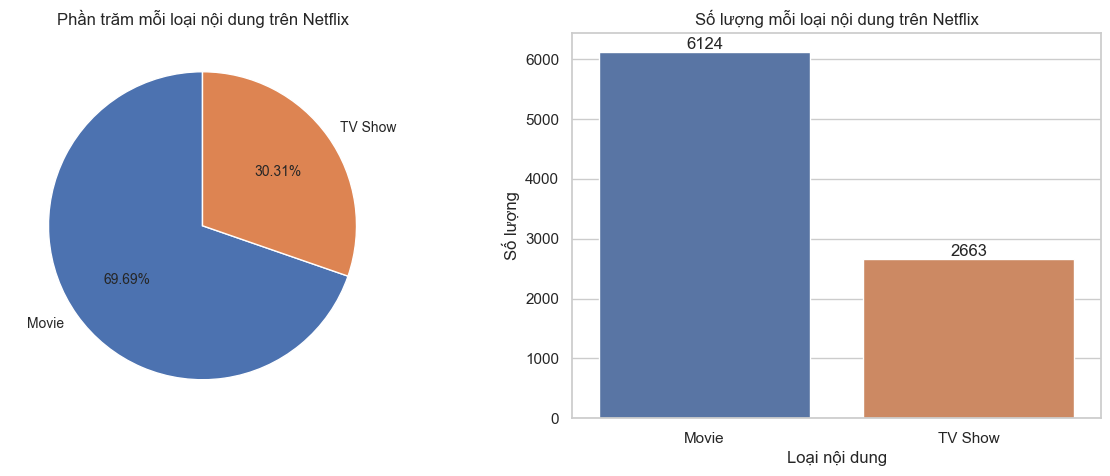

In [184]:
# Phân tích type
types = data.groupby(['type',])['type'].count().reset_index(name='count')
types = types.set_index('type')
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
types.plot.pie(y='count', ax=ax, autopct='%1.2f%%', startangle=90, shadow=False, labels=types.index, legend=False, fontsize=10)
# set x,y label off
ax.set_xlabel('')
ax.set_ylabel('')
plt.title("Phần trăm mỗi loại nội dung trên Netflix")

ax = fig.add_subplot(1, 2, 2)
sns.countplot(data=data, x="type", ax=ax)
# Thêm số liệu trên đầu cột
for container in ax.containers:
    ax.bar_label(container)

plt.title("Số lượng mỗi loại nội dung trên Netflix")
ax.set_xlabel('Loại nội dung')
ax.set_ylabel('Số lượng')
plt.show()

Nhận xét: 
- Dữ liệu Netflix trong bộ dữ liệu có 2 loại nội dung là TV Show và Movie
- Trong đó Movie chiếm số lượng lớn nội dung với tỉ lệ 69.69% so với TV Show với tỉ lượng 30.31%

### **Phân tích tiêu đề của các bộ phim**

In [188]:
# Phân tích cột title
print("Số lượng title duy nhất: " + str(len(data['title'].unique())))
# print the longest title
print("Độ dài title dài nhất: " + str(data['title'].str.len().max()))
# tên của title dài nhất
print("Tên của title dài nhất: " + data['title'][data['title'].str.len() == data['title'].str.len().max()].values[0])

Số lượng title duy nhất: 8787
Độ dài title dài nhất: 104
Tên của title dài nhất: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton


Nhận xét: 
- Sau khi loại bỏ các bộ phim trùng lặp ở phần làm sạch dữ liệu, ta có 8787 bộ phim có tên khác nhau
- Tên phim dài nhất là "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton" với 104 ký tự

### **Phân tích thông tin đạo diễn của các nội dung trên Netflix**

In [189]:
# Phân tích cột director
print(data['director'].value_counts().drop('Not Given').describe())
print("----------------------------------")
print("Số lượng đạo diễn: " + str(len(data['director'].unique()) - 1))
print("Số lượng Not Given: " + str(data['director'].value_counts()['Not Given']))
print("Phần trăm Not Given: " + str(round(data['director'].value_counts()['Not Given']/len(data)*100, 2)) + "%")

count    4527.00000
mean        1.36956
std         1.12505
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max        20.00000
Name: director, dtype: float64
----------------------------------
Số lượng đạo diễn: 4527
Số lượng Not Given: 2587
Phần trăm Not Given: 29.44%


Text(0, 0.5, 'Số lượng đạo diễn')

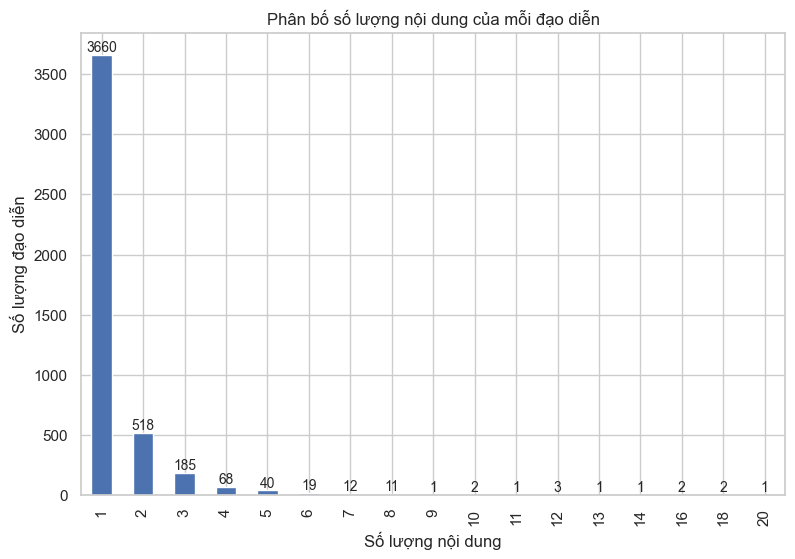

In [190]:
# Plot phân bố số lượng nội dung của mỗi đạo diễn
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 2, 1)
number_of_content_by_director = data['director'].value_counts().drop('Not Given')
fre = number_of_content_by_director.value_counts().sort_index()
# add number of content to each bar
ax = fre.plot(kind='bar', ax=ax)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Phân bố số lượng nội dung của mỗi đạo diễn")
ax.set_xlabel('Số lượng nội dung')
ax.set_ylabel('Số lượng đạo diễn')


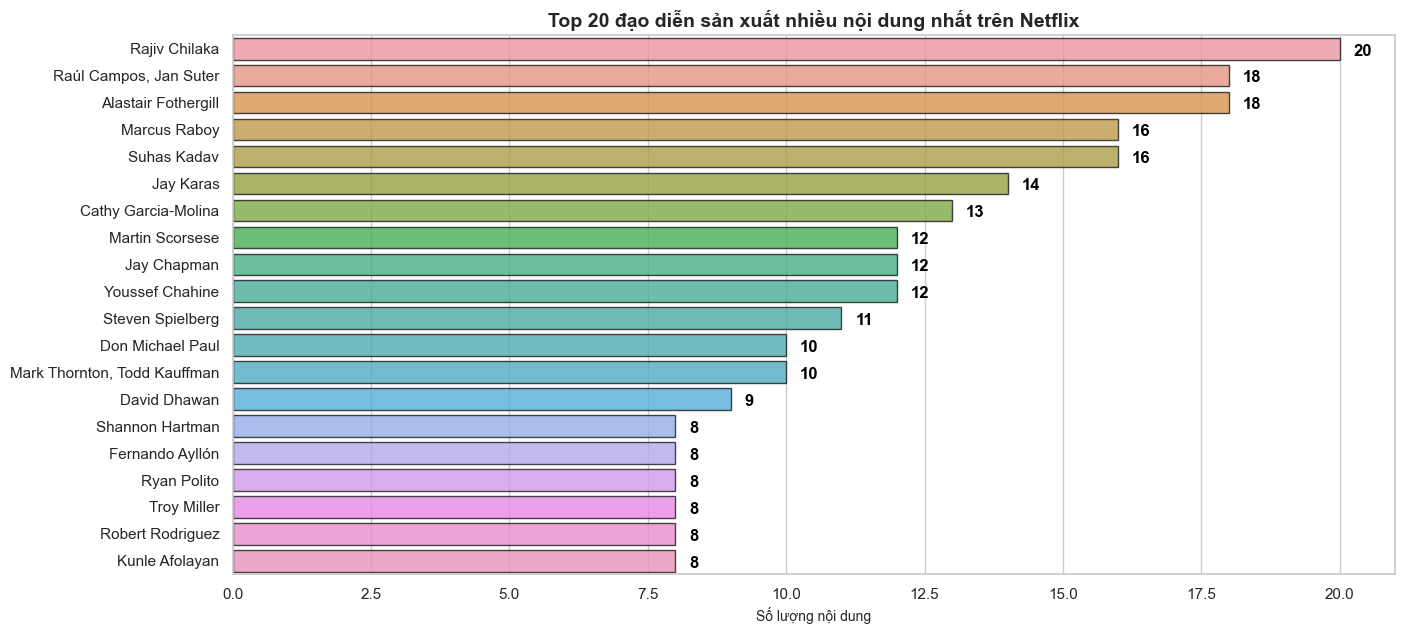

In [191]:
# Plot top 20 đạo diễn sản xuất nhiều nội dung nhất trên Netflix
plt.figure(figsize=(15, 7))
top_20 = data['director'].value_counts().drop('Not Given').head(20)
sns.barplot(x=top_20.values, y=top_20.index,
            edgecolor='k', linewidth=1, alpha=0.8)
# add number of each director on top of bar
for i, v in enumerate(top_20.values):
    plt.text(v + 0.25 , i + .25, str(v), color='black', fontweight='bold')
plt.title("Top 20 đạo diễn sản xuất nhiều nội dung nhất trên Netflix", fontsize=14, fontweight='heavy')
plt.xlabel("Số lượng nội dung", fontsize=10)
plt.show()

Nhận xét:
- Số lượng đạo diễn khác nhau là 4527 (vì có một record là Not Given)
- Số lượng đạo diễn không có thông tin là 2587, chiếm 29.44%
- Số nội dung nhiều nhất của một đạo diễn là 20 (đạo diễn Rajiv Chilaka)
- 75% số lượng đạo diễn chỉ có 1 nội dung

### **Phân tích thông tin của các quốc gia có nội dung trên Netflix**

In [192]:
# Phân tích cột country
print(data['country'].value_counts().drop('Not Given').describe())
print("----------------------------------")
print("Số lượng quốc gia: " + str(len(data['country'].unique()) - 1))
print("Số lượng Not Given: " + str(data['country'].value_counts()['Not Given']))
print("Phần trăm Not Given: " + str(round(data['country'].value_counts()['Not Given']/len(data)*100, 2)) + "%")


count      85.00000
mean      100.00000
std       374.25332
min         1.00000
25%         2.00000
50%        10.00000
75%        76.00000
max      3240.00000
Name: country, dtype: float64
----------------------------------
Số lượng quốc gia: 85
Số lượng Not Given: 287
Phần trăm Not Given: 3.27%


Text(0.5, 1.0, 'Top 20 quốc gia có nhiều nội dung nhất trên Netflix')

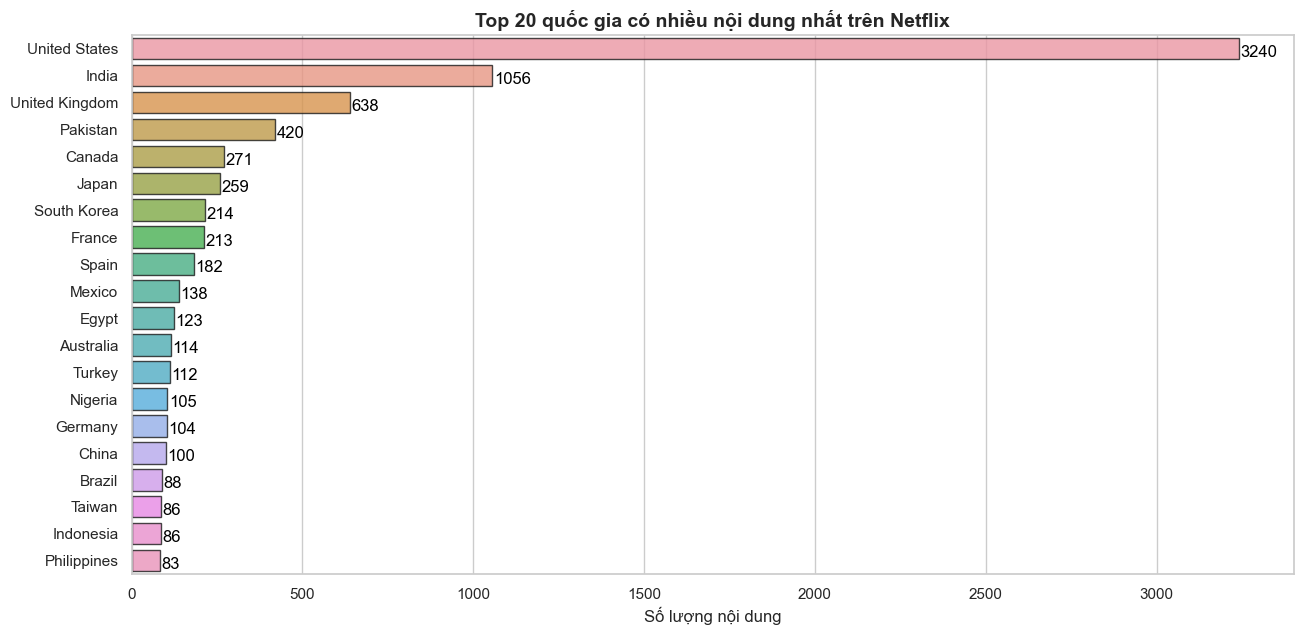

In [193]:
# Plot top 20 quốc gia có nhiều nội dung nhất trên Netflix
plt.figure(figsize=(15, 7))
top_20 = data['country'].value_counts().drop('Not Given').head(20)
sns.barplot(x=top_20.values, y=top_20.index,
            edgecolor='k', linewidth=1, alpha=0.8)
for i, v in enumerate(top_20.values):
    plt.text(v + 4, i + .3, str(v), color='black')

plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 20 quốc gia có nhiều nội dung nhất trên Netflix", fontsize=14, fontweight='heavy')


Text(0.5, 1.0, 'Top 20 quốc gia sản xuất nhiều Movies nhất')

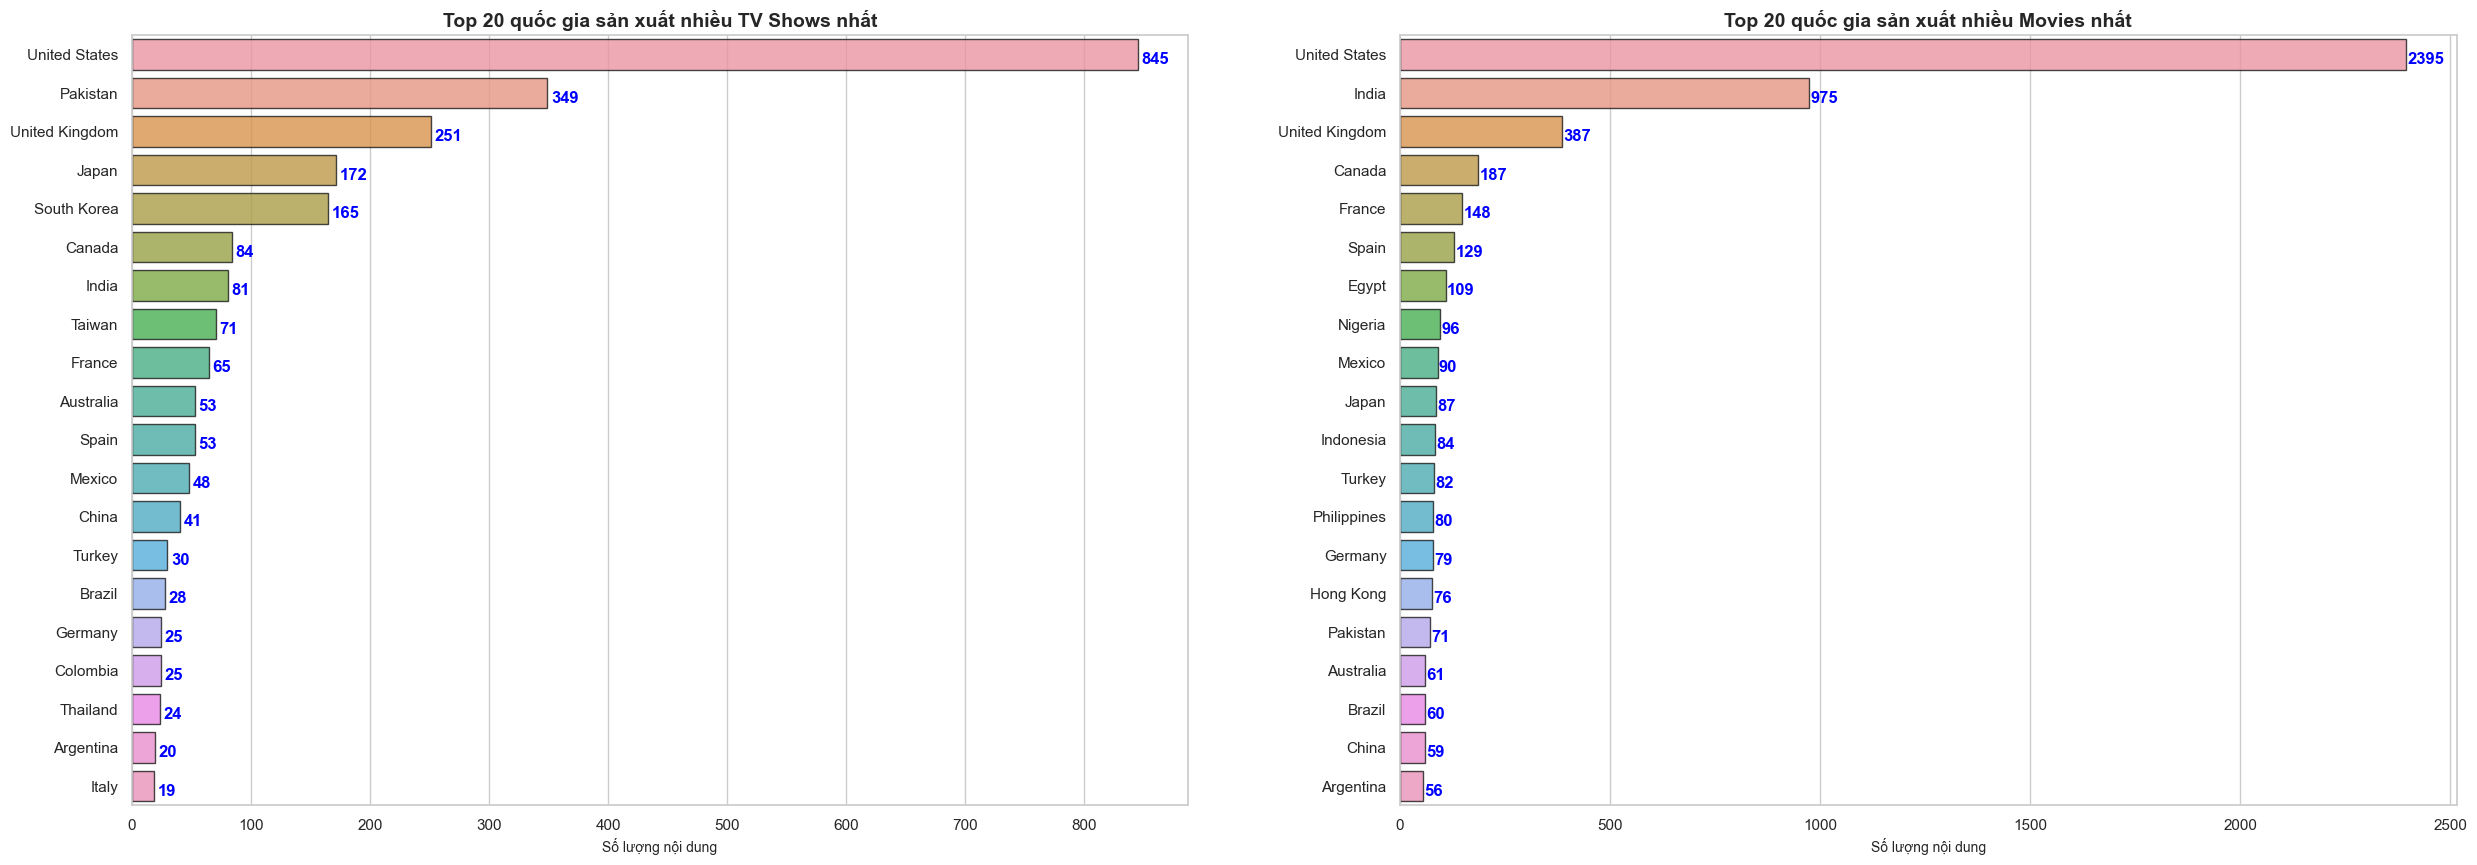

In [194]:
# Top 20 quốc gia có nhiều nội dung nhất trên Netflix theo từng loại nội dung
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 2, 1)
top_20 = data_tv['country'].value_counts().drop('Not Given').head(20)
sns.barplot(x=top_20.values, y=top_20.index, edgecolor='k', linewidth=1, alpha=0.8)
for i, v in enumerate(top_20.values):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.xlabel("Số lượng nội dung", fontsize=10)
plt.title("Top 20 quốc gia sản xuất nhiều TV Shows nhất", fontsize=14, fontweight='heavy')
#---------------------------------------------
ax = fig.add_subplot(1, 2, 2)
top_20 = data_movie['country'].value_counts().drop('Not Given').head(20)
sns.barplot(x=top_20.values, y=top_20.index, edgecolor='k', linewidth=1, alpha=0.8)
for i, v in enumerate(top_20.values):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.xlabel("Số lượng nội dung", fontsize=10)
plt.title("Top 20 quốc gia sản xuất nhiều Movies nhất", fontsize=14, fontweight='heavy')

Nhận xét:
- Số quốc gia có trong tập dữ liệu là 85
- Số record Not Given là 287, chiếm 3.27%
- Mỹ và Ấn Độ là hai quốc gia có số lượng nội dung lớn nhất, với 3240 và 1056 nội dung tương ứng
- 75% quốc gia có số lượng nội dung lớn hơn 76??
- Xét về TV Shows
    - Mỹ và Pakistan là hai quốc gia có số lượng TV Shows lớn nhất với 845 và 349 nội dung tương ứng
- Xét về Movies
    - Mỹ và Ấn Độ là hai quốc gia có số lượng Movies lớn nhất với 2395 và 975 nội dung tương ứng 

### **Phân tích thông tin về ngày các nội dung được thêm vào Netflix**

In [183]:
# Phân tích cột date_added
print("Ngày có nhiều nội dung được thêm vào Netflix nhất: " + str(data['date_added'].value_counts().idxmax()) + " với " + str(data['date_added'].value_counts().max()) + " nội dung")

Ngày có nhiều nội dung được thêm vào Netflix nhất: 2020-01-01 00:00:00 với 110 nội dung


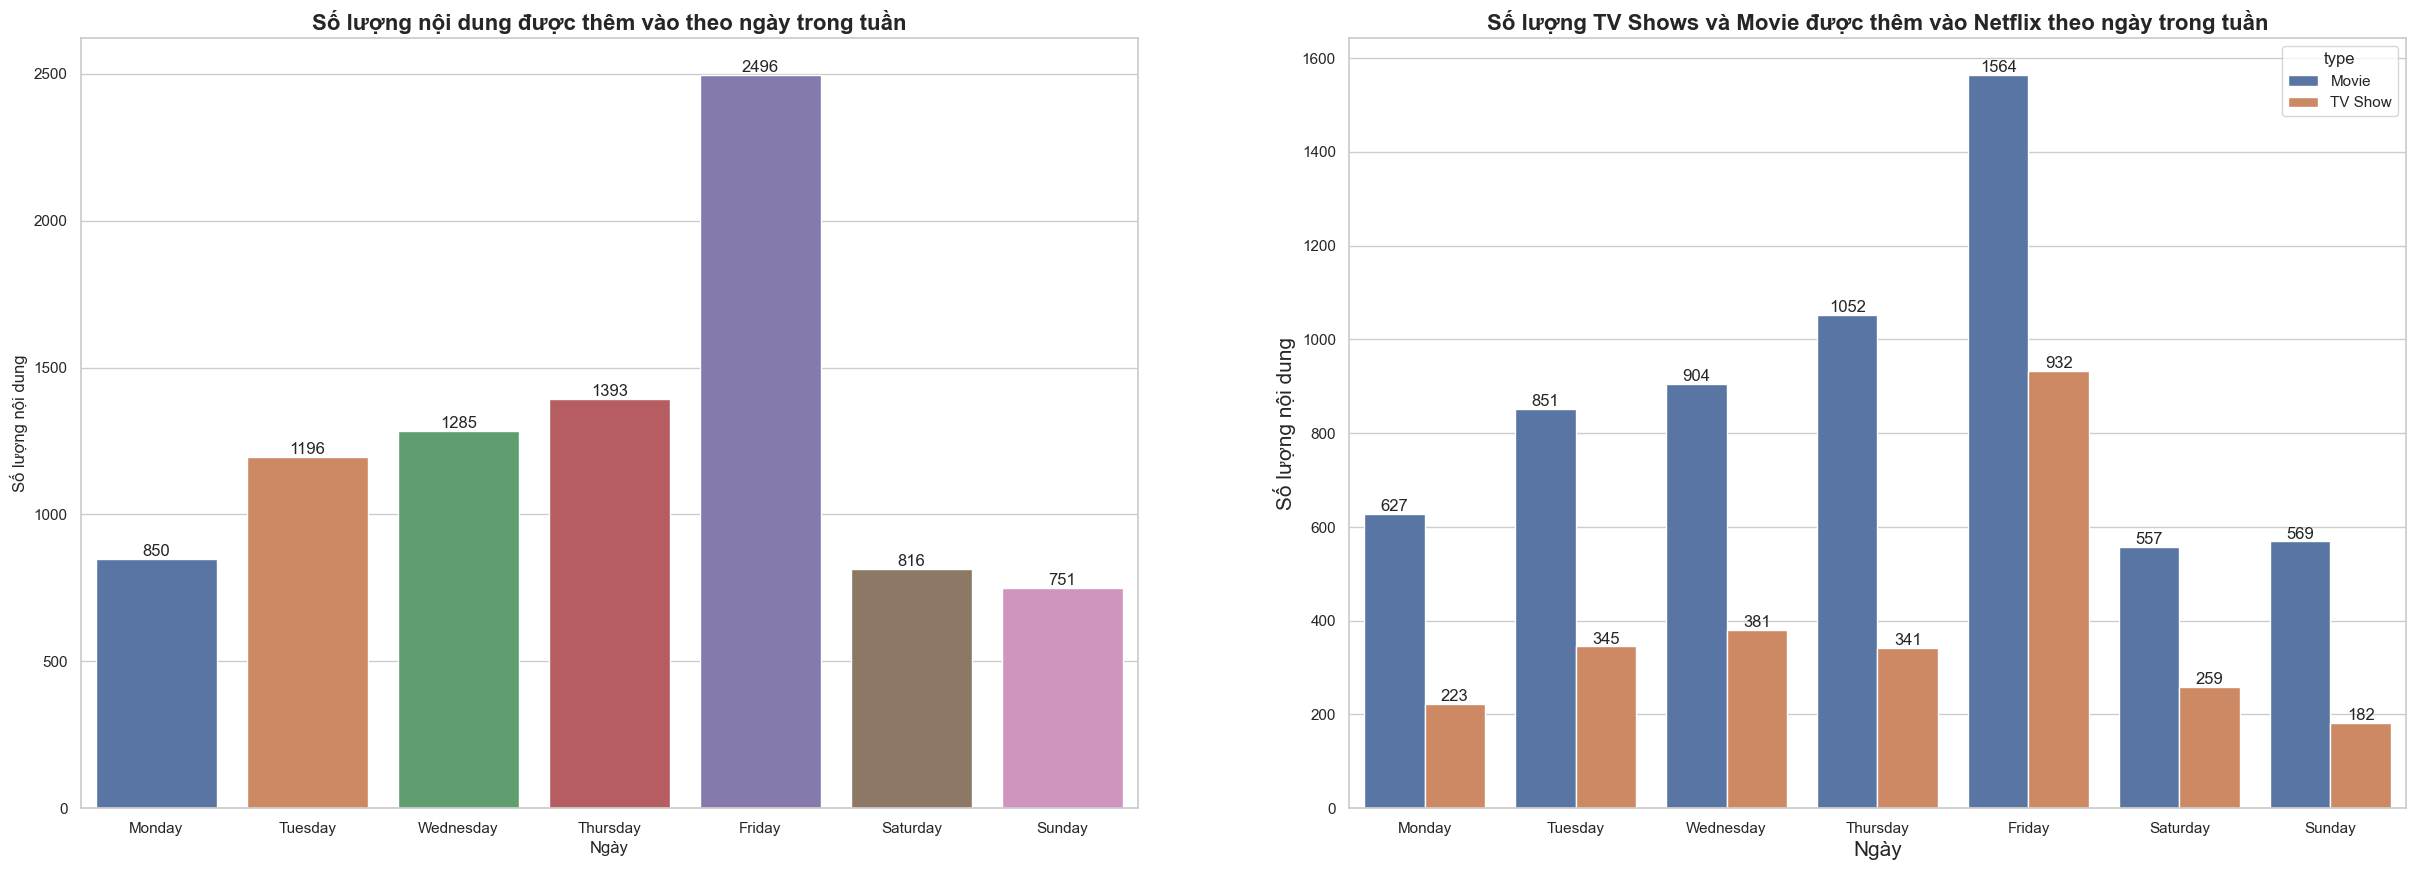

In [180]:
# Phân tích day_added
fig = plt.figure(figsize=(30, 10))
# Subplot 1 - Số lượng nội dung được thêm vào theo ngày trong tuần
ax = fig.add_subplot(1, 2, 1)
ax = sns.countplot(data=data, x="day_added", order=[
                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Số lượng nội dung được thêm vào theo ngày trong tuần",
          fontsize=16, fontweight='heavy')
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)

#Subplot 2 - Số lượng TV Shows và Movie được thêm vào Netflix theo ngày trong tuần
ax = fig.add_subplot(1, 2, 2)
ax = sns.countplot(data=data, x="day_added", order=[
                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='type')
ax.set_title(
    "Số lượng TV Shows và Movie được thêm vào Netflix theo ngày trong tuần", fontsize=16, fontweight='heavy')
ax.set_xlabel('Ngày', fontsize=15)
ax.set_ylabel('Số lượng nội dung', fontsize=15)
for container in ax.containers:
    ax.bar_label(container)


Nhận xét:
- Ngày có nhiều nội dung thêm vào Netflix nhất là ngày 01/01/2020 với 110 nội dung
- Các nội dung (cả Movies và TV Shows) đều thường được thêm vào Netflix vào thứ 6 (Friday)

### **Phân tích thông tin về năm mà các nội dung được thêm vào Netflix**

Text(0, 0.5, 'Năm')

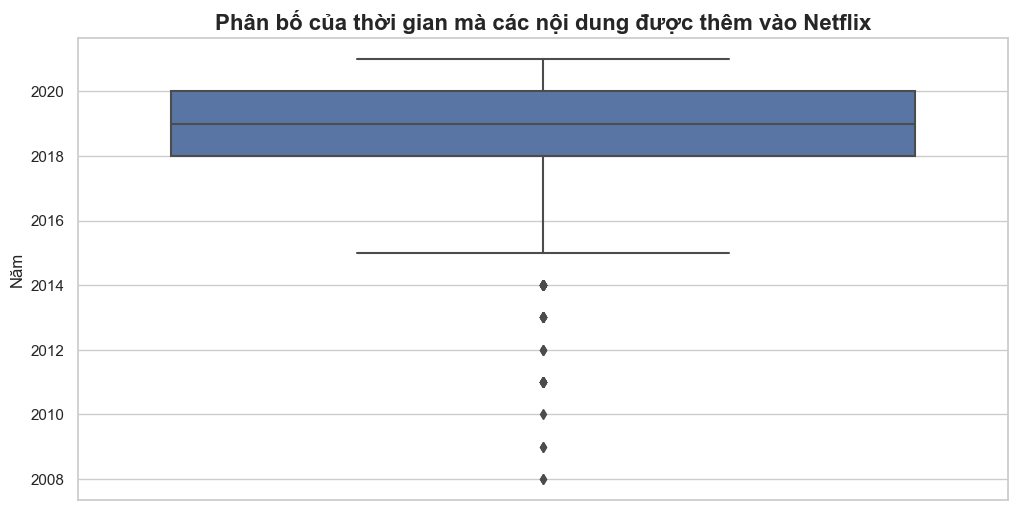

In [197]:
# Phân bố của year_added
fig = plt.figure(figsize=(12, 6))
sns.boxplot(y=data['year_added'])
plt.title("Phân bố của thời gian mà các nội dung được thêm vào Netflix", fontsize=16, fontweight='heavy')
plt.xlabel("")
plt.ylabel("Năm", fontsize=12)

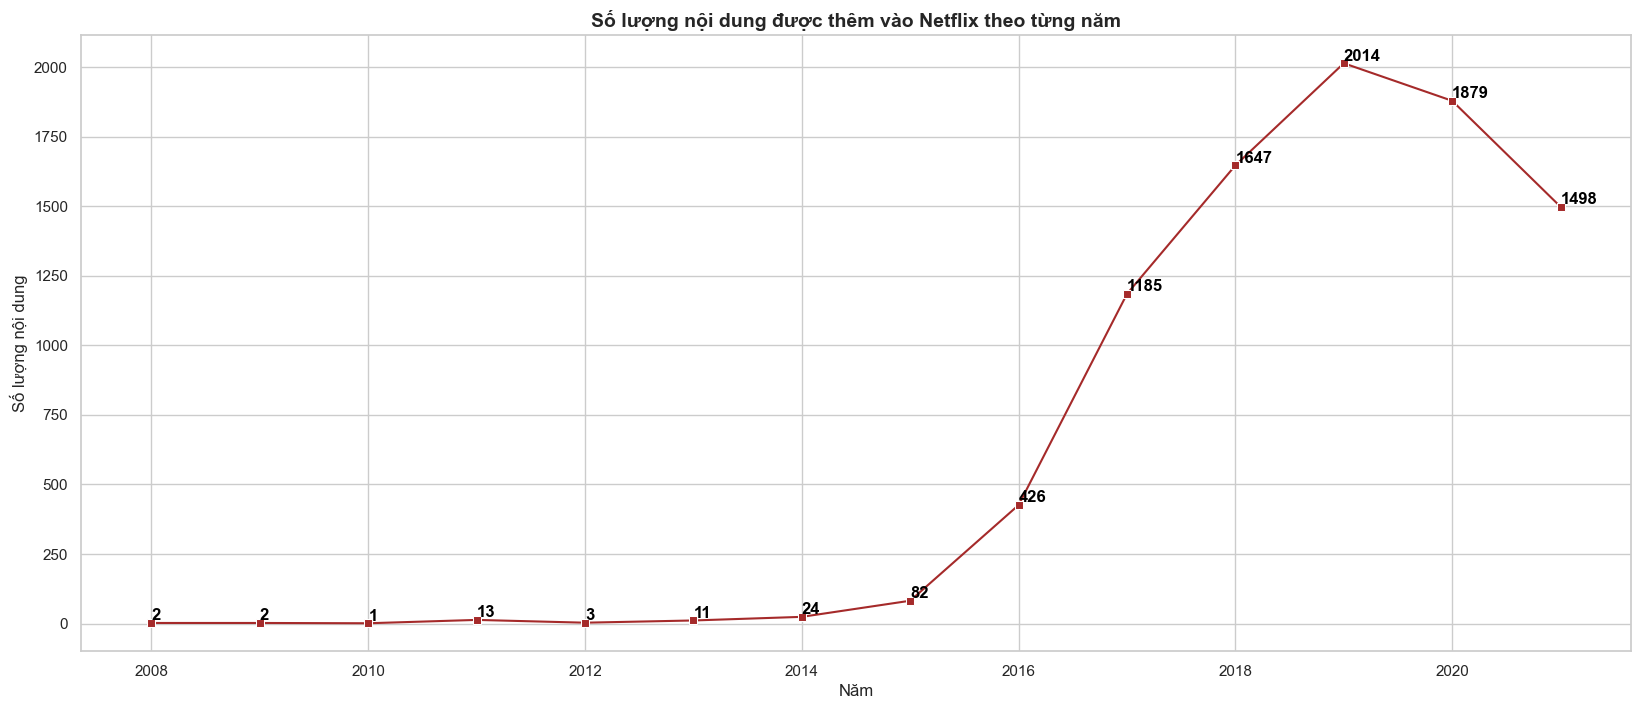

In [198]:
# Số luợng nội dung được thêm vào theo từng năm
plt.figure(figsize=(20, 8))
sns.lineplot(x=data['year_added'].value_counts().index, y=data['year_added'].value_counts().values, alpha=1, color="brown", marker='s')
# thêm số lượng nội dung vào từng năm vào đồ thị
for i, v in enumerate(data['year_added'].value_counts().sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='black', fontweight='bold')

plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng nội dung được thêm vào Netflix theo từng năm', fontsize=14, fontweight='heavy')
plt.show()

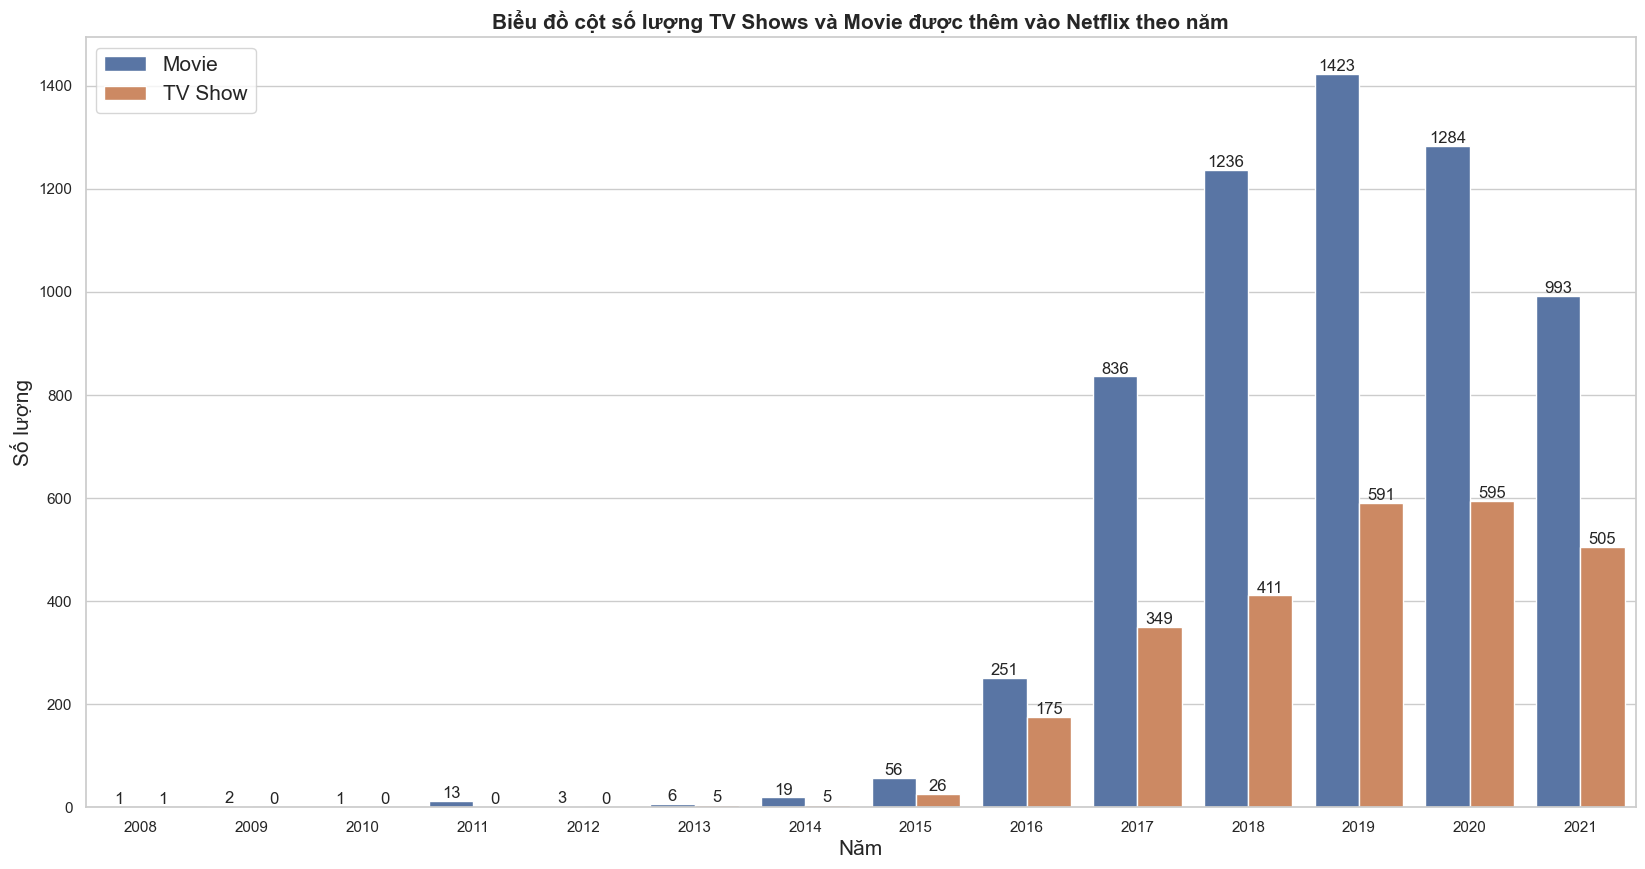

In [203]:
# Phân tích số lương Movie và TV Shows được thêm vào theo từng năm
plt.figure(figsize=[20, 10])
ct = sns.countplot(x=data['year_added'], data=data, hue='type')
ct.set_title( "Biểu đồ cột số lượng TV Shows và Movie được thêm vào Netflix theo năm", fontsize=15, fontweight='heavy')
ct.set_xlabel('Năm', fontsize=15)
ct.set_ylabel('Số lượng', fontsize=15)
for container in ct.containers:
    ct.bar_label(container)
ct.legend(loc='upper left', fontsize=15)


Text(0.5, 1.0, 'Biểu đồ đường thể hiện số lượng TV Shows và Movie được thêm vào theo từng năm')

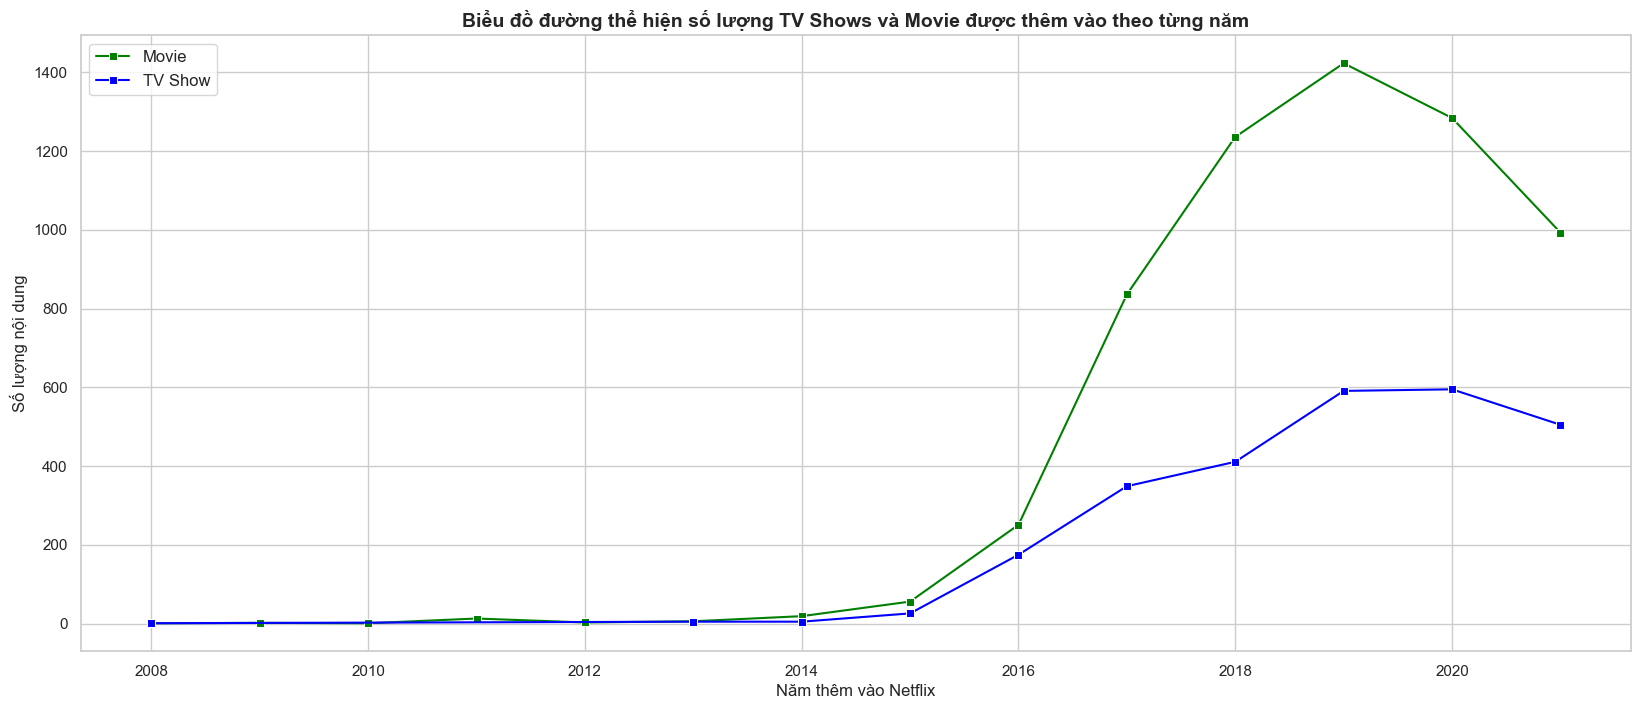

In [202]:
# Biểu đồ đường thể hiện số lượng TV Shows và Movie được thêm vào theo từng năm
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x=data_movie['year_added'].value_counts().index, y=data_movie['year_added'].value_counts().values, color="green", marker='s', label='Movie')
ax = sns.lineplot(x=data_tv['year_added'].value_counts().index, y=data_tv['year_added'].value_counts().values,  color="blue", marker='s', label='TV Show')
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Năm thêm vào Netflix", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Biểu đồ đường thể hiện số lượng TV Shows và Movie được thêm vào theo từng năm',fontsize=14, fontweight='heavy')


Nhận xét:
- Các nội dung trong tập dữ liệu được thêm vào Netflix từ năm 2008 đến 2021
- Phần lớn các nội dung được thêm vào Netflix từ năm 2018 đến 2020 (50%)
- Năm 2019 có số lượng nội dung được thêm vào Netflix nhiều nhất (2014 nội dung)
- Movies được thêm vào Netflix nhiều nhất vào năm 2019 (1423 nội dung) và TV Shows được thêm vào Netflix nhiều nhất vào năm 2018 (595 nội dung)
- Số lượng nội dung được thêm vào Netflix tăng nhanh từ năm 2008 đến năm 2019. Tu năm 2019 đến 2021, số lượng nội dung được thêm vào Netflix giảm dần. Điều này có thể do sự ảnh hưởng của dịch Covid-19.

### **Phân tích cột thông tin về tháng mà các nội dung được thêm vào Netflix**

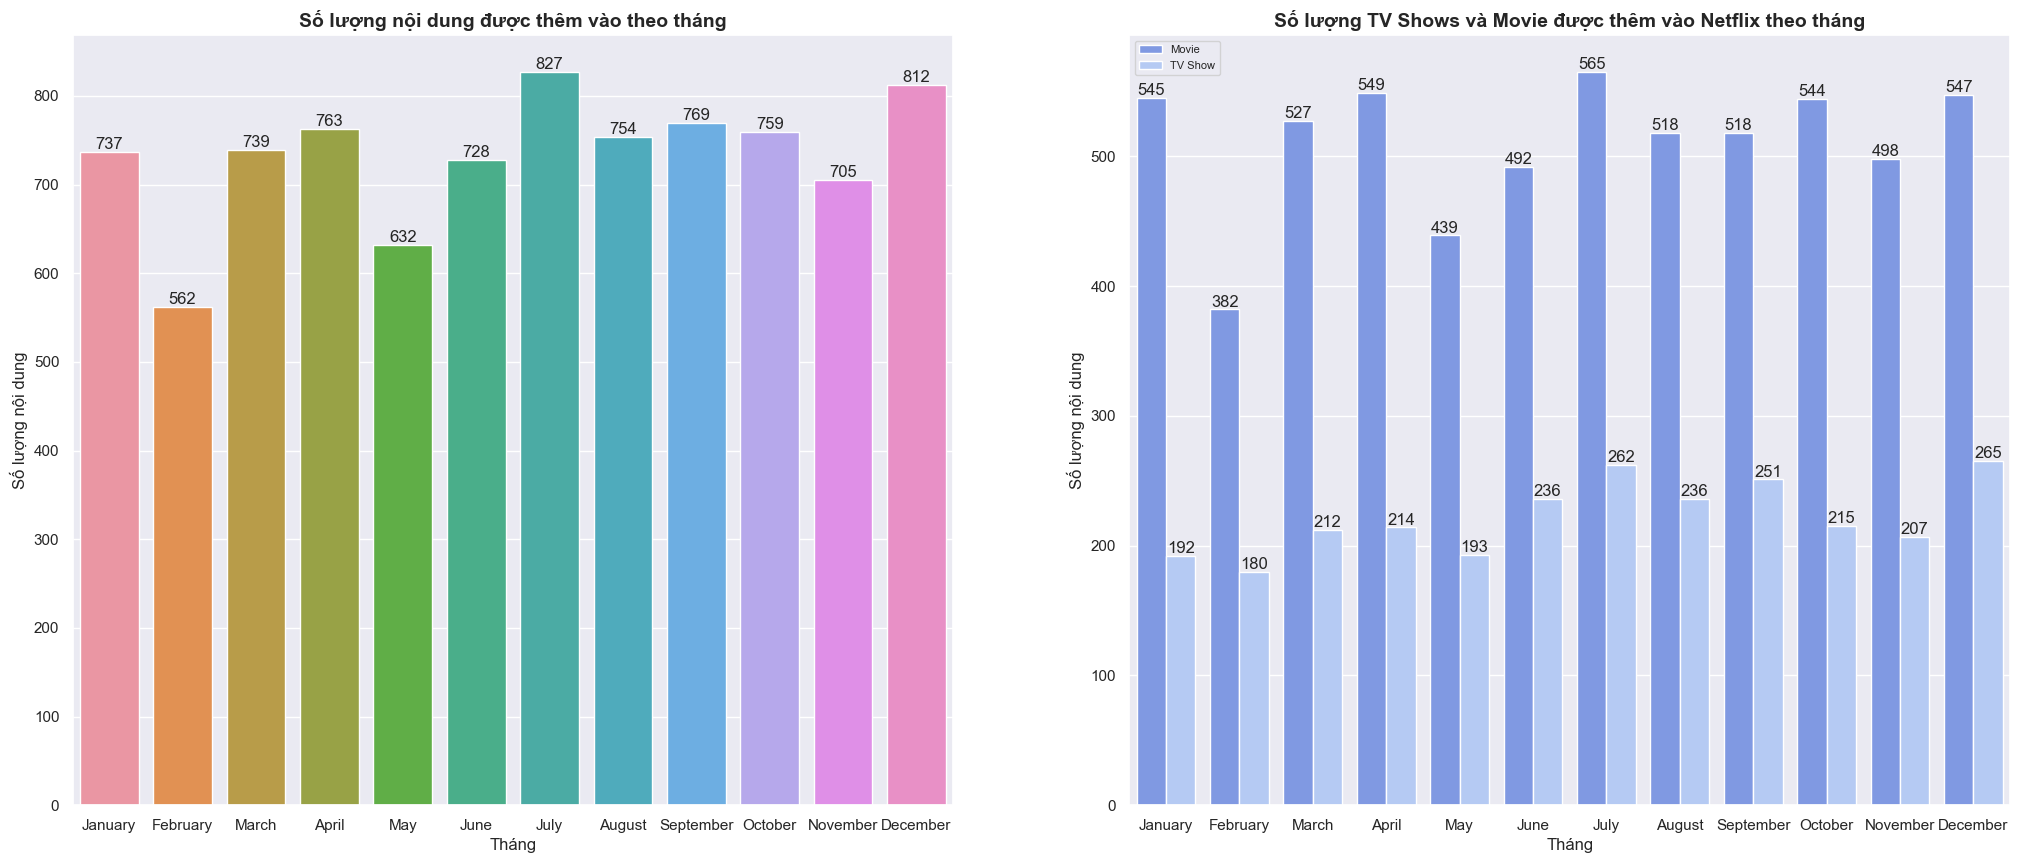

In [210]:
# Plot biểu đồ cột thể hiện số lượng nội dung được thêm vào theo tháng
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 2, 1)
# order by month_added in order from January to December
ax = sns.countplot(data=data, x="month_added", order=[
                   'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Số lượng nội dung được thêm vào theo tháng",
          fontsize=14, fontweight='heavy')
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)

ax = fig.add_subplot(1, 2, 2)

base_color = sns.color_palette('coolwarm', n_colors=5)
ax = sns.countplot(data=data, x="month_added", order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'], hue='type', palette=base_color)
ax.set_title(
    "Số lượng TV Shows và Movie được thêm vào Netflix theo tháng", fontsize=14, fontweight='heavy')
ax.set_xlabel('Tháng', fontsize=12)
ax.set_ylabel('Số lượng nội dung', fontsize=12)
ax.legend(loc='upper left', fontsize=8)
for container in ax.containers:
    ax.bar_label(container)

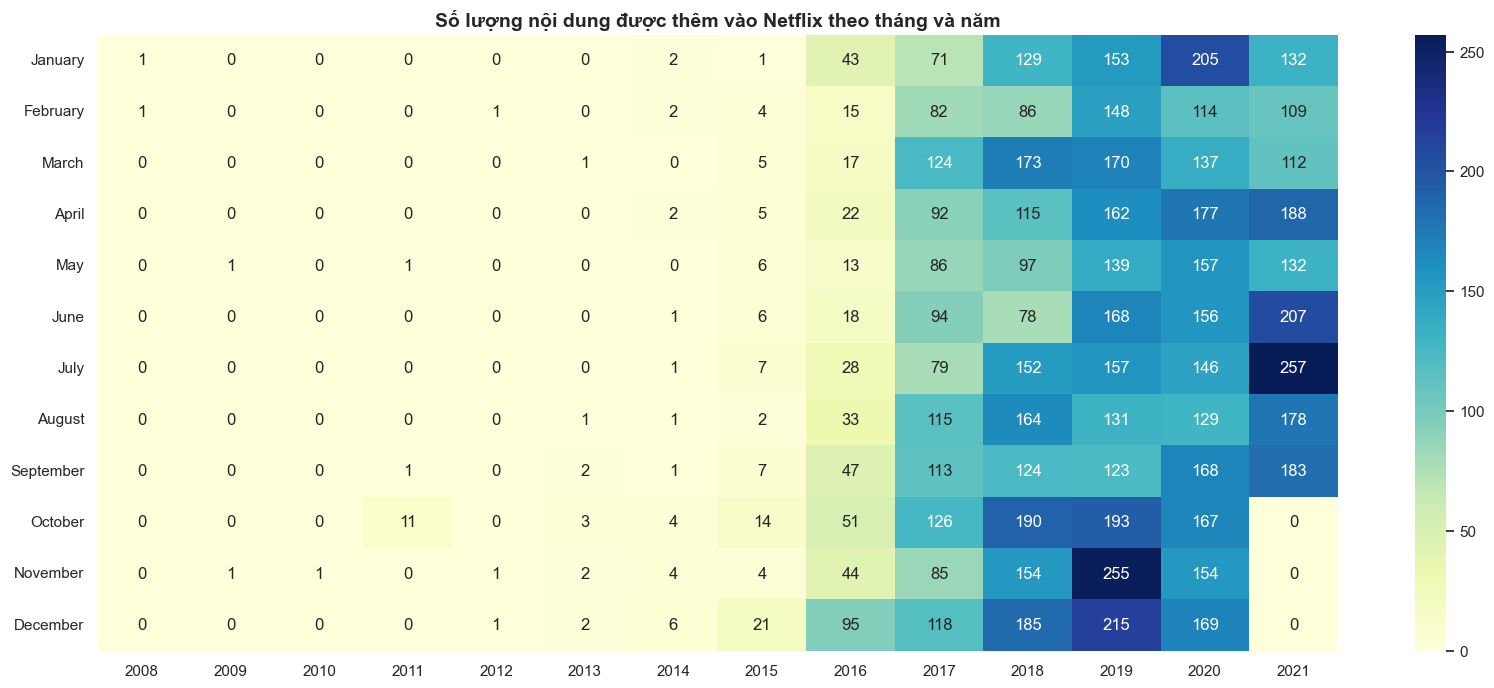

In [211]:
# Plot biểu đồ nhiệt thể hiện số lượng nội dung được thêm vào theo tháng và năm
year_added = data['year_added'].value_counts().index
year_added = sorted(year_added)
contentPerYear = {}
month = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
for year in year_added:
    contentPerYear[year] = data[data['year_added']
                                == year]['month_added'].value_counts()
    contentPerYear[year] = contentPerYear[year].reindex(month, fill_value=0)
    contentPerYear[year] = contentPerYear[year].values

contentPerYear = pd.DataFrame(contentPerYear)
# change index to month
contentPerYear.index = month
plt.figure(figsize=(20, 8))
sns.heatmap(contentPerYear, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Số lượng nội dung được thêm vào Netflix theo tháng và năm",  fontsize=14, fontweight='heavy')
plt.show()


Nhận xét:
- Các nội dung thường được thêm vào Netflix nhiều nhất vào tháng 7 (July) và tháng 12 (December)
- Số lượng Movies và TV Shows thay đổi không theo quy luật nào cụ thể, nhưng nhìn chung vẫn được thêm vào Netflix nhiều nhất vào tháng 7 và tháng 12
- Từ biểu đồ nhiệt, ta thấy được số lượng nội dung được thêm vào Netflix từ tháng 10/2019 đến tháng 01/2020 và từ tháng 06 - 09/2021 là khá lớn so với các giai đoạn khác
- 3 tháng cuối năm 2021 có dữ liệu là 0, có thể do dữ liệu chưa được cập nhật

### **Phân tích thông tin về năm phát hành của các nội dung trên Netflix**

Text(0, 0.5, 'Năm phát hành')

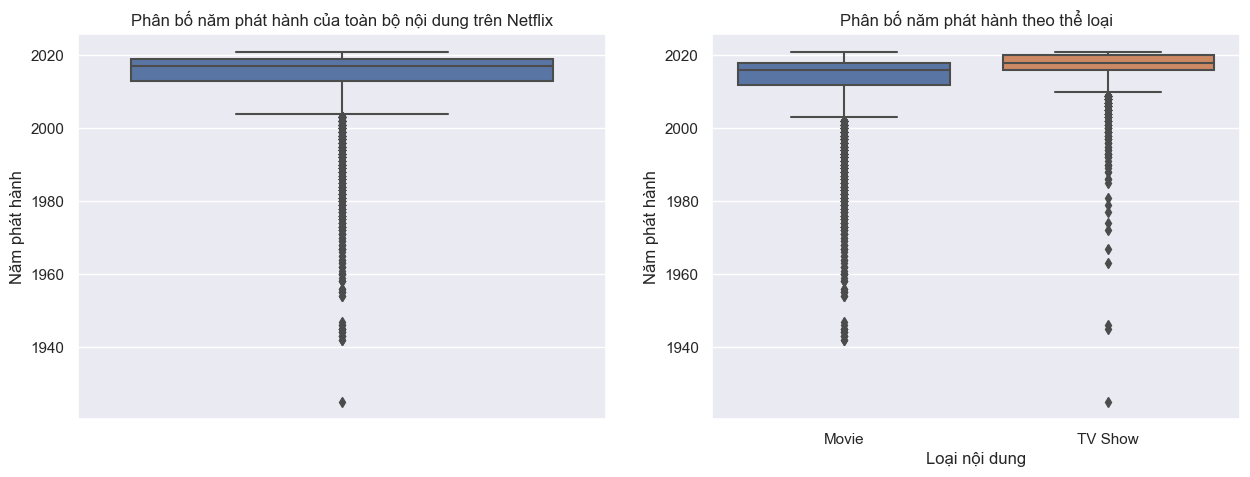

In [213]:
# Biểu đồ phân bố năm phát hành của các nội dung trên Netflix
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(y=data['release_year'])
ax.set_title("Phân bố năm phát hành của toàn bộ nội dung trên Netflix", fontsize=12)
ax.set_ylabel('Năm phát hành', fontsize=12)

ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x='type', y='release_year', data=data)
ax.set_title("Phân bố năm phát hành theo thể loại", fontsize=12)
ax.set_xlabel('Loại nội dung', fontsize=12)
ax.set_ylabel('Năm phát hành', fontsize=12)

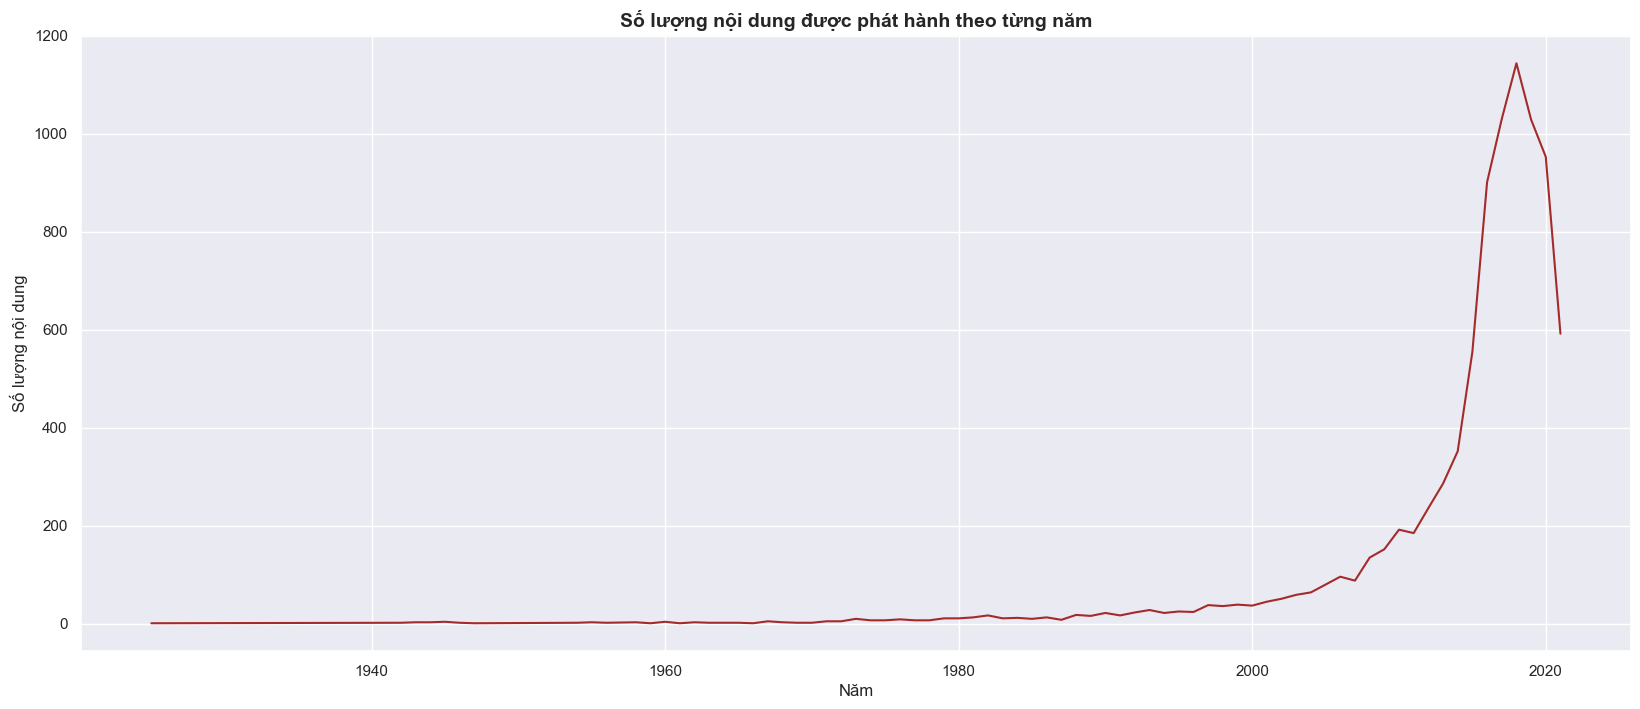

In [215]:
# Biểu đồ đường biểu thị số luợng nội dung phát hành theo từng năm (2008-2021)
plt.figure(figsize=(20, 8))
sns.lineplot(x=data['release_year'].value_counts().index, y=data['release_year'].value_counts().values, alpha=1, color="brown")
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng nội dung được phát hành theo từng năm',
          fontsize=14, fontweight='heavy')
plt.show()


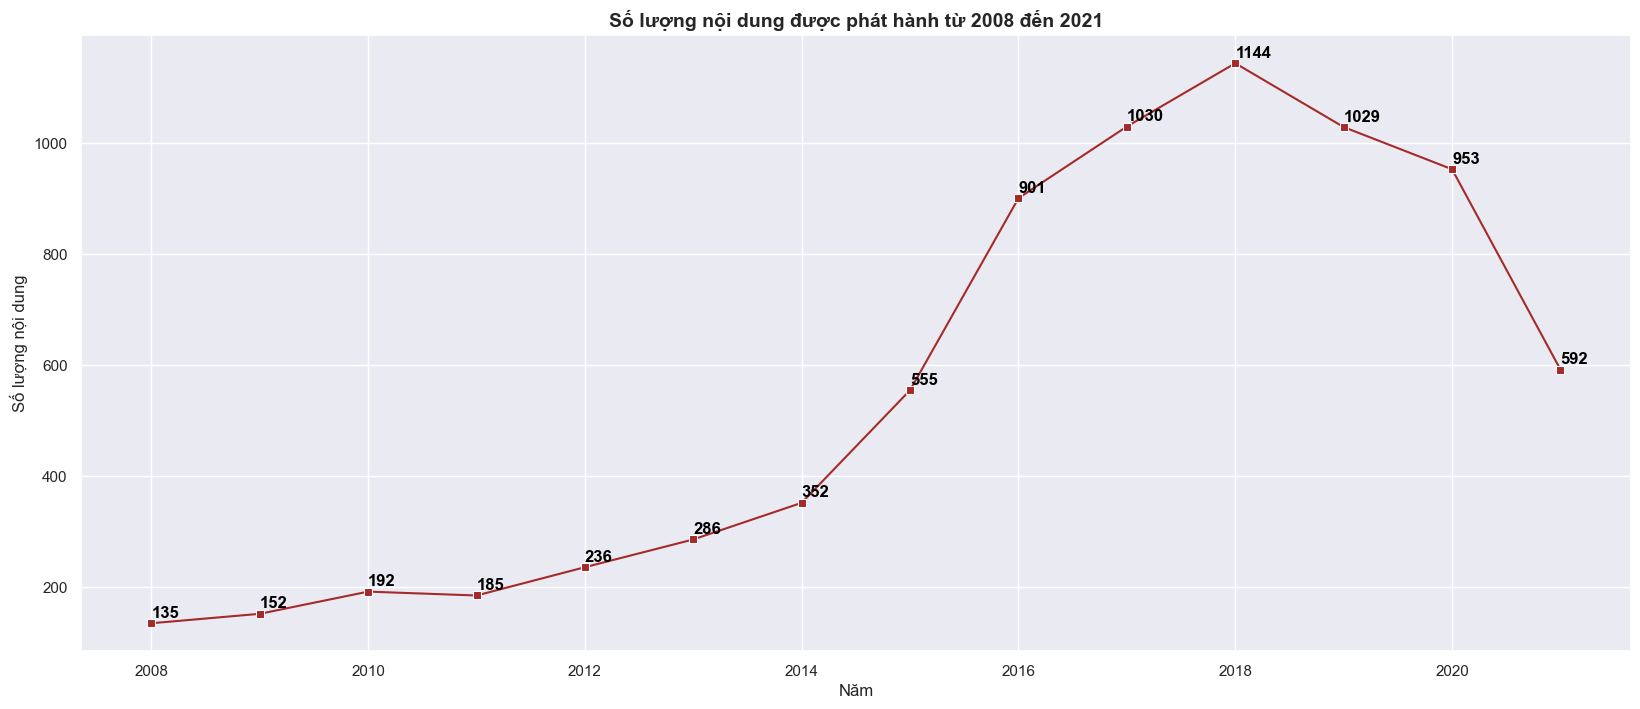

In [216]:
# Biểu đồ đường biểu thị số luợng nội dung phát hành theo từng năm (2008-2021)
plt.figure(figsize=(20, 8))
fr08to21 = data[(data['release_year'] >= 2008) & (data['release_year'] <= 2021)]
ax=sns.lineplot(x=fr08to21['release_year'].value_counts().index, y=fr08to21['release_year'].value_counts().values, alpha=1, color="brown", marker='s')

# thêm số lượng nội dung vào từng năm vào đồ thị
for i, v in enumerate(fr08to21['release_year'].value_counts().sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='black', fontweight='bold')
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng nội dung được phát hành từ 2008 đến 2021',
          fontsize=14, fontweight='heavy')
plt.show()

Text(0.5, 1.0, 'Số lượng TV Shows và Movie được phát hành từ 2008 đến 2021')

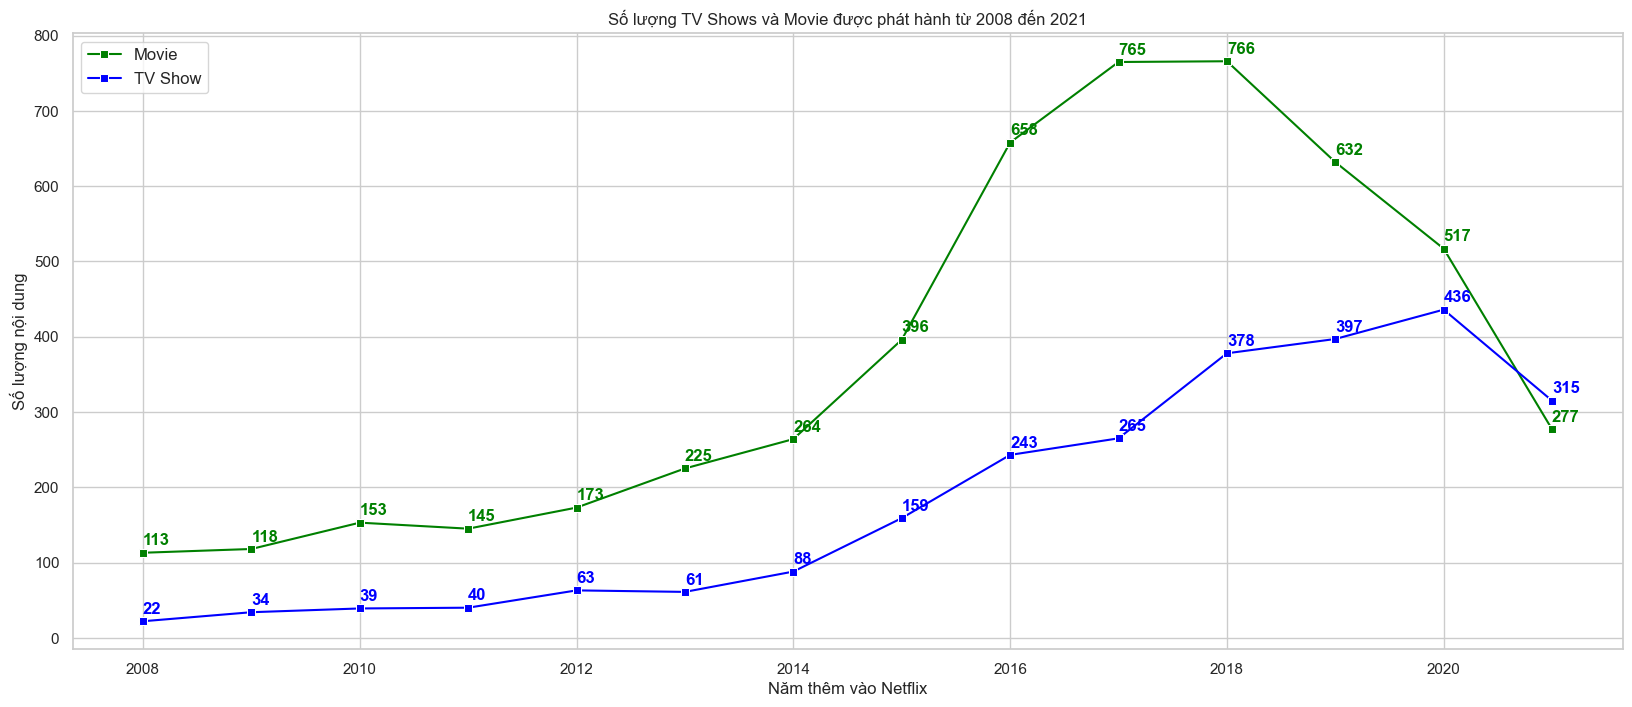

In [218]:
# Biểu đồ đường biểu thị số luợng nội dung phát hành theo từng năm (2008-2021), theo thể loại
plt.figure(figsize=(20, 8))
fr08to21_movie = fr08to21[fr08to21['type'] == 'Movie']
fr08to21_tv = fr08to21[fr08to21['type'] == 'TV Show']

ax = sns.lineplot(x=fr08to21_movie['release_year'].value_counts().index, y=fr08to21_movie['release_year'].value_counts().values, color="green", marker='s', label='Movie')
for i, v in enumerate(fr08to21_movie['release_year'].value_counts().sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='green', fontweight='bold')


ax = sns.lineplot(x=fr08to21_tv['release_year'].value_counts().index, y=fr08to21_tv['release_year'].value_counts().values,  color="blue", marker='s', label='TV Show')
for i, v in enumerate(fr08to21_tv['release_year'].value_counts().sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='blue', fontweight='bold')

plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Năm thêm vào Netflix", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng TV Shows và Movie được phát hành từ 2008 đến 2021')

Nhận xét:
- Hầu hết các nội dung trên Netflix được phát hành từ năm 2010 đến 2021. Trong đó năm 2018 có số lượng nội dung phát hành nhiều nhất (tổng cộng 1144 nội dung)
- Số lượng nội dung được phát hành tăng đều đến năm 2018. Từ năm 2018 đến năm 2021, số lượng nội dung được phát hành giảm dần. Điều này có thể do sự ảnh hưởng của dịch Covid-19.
- Năm 2018 cũng là năm có số lượng Movie được phát hành nhiều nhất (tổng cộng 766 movies). Trong khi đó năm 2020 là năm có số lượng TV Shows được phát hành nhiều nhất (tổng cộng 378 TV Shows)
- Từ 2008 đến 2020, số lượng Movie được phát hành luôn lớn hơn số lượng TV Shows được phát hành. Tuy nhiên vào năm 2021, số lượng TV Shows được phát hành đã lớn hơn số lượng Movie được phát hành.

### **Phân tích cột rating**

In [86]:
# get number of type of rating
print("Số lượng loại rating: " + str(data['rating'].nunique()))
# get all rating
print(data['rating'].unique())

Số lượng loại rating: 14
['PG-13' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y7' 'TV-Y' 'PG' 'TV-G' 'R' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


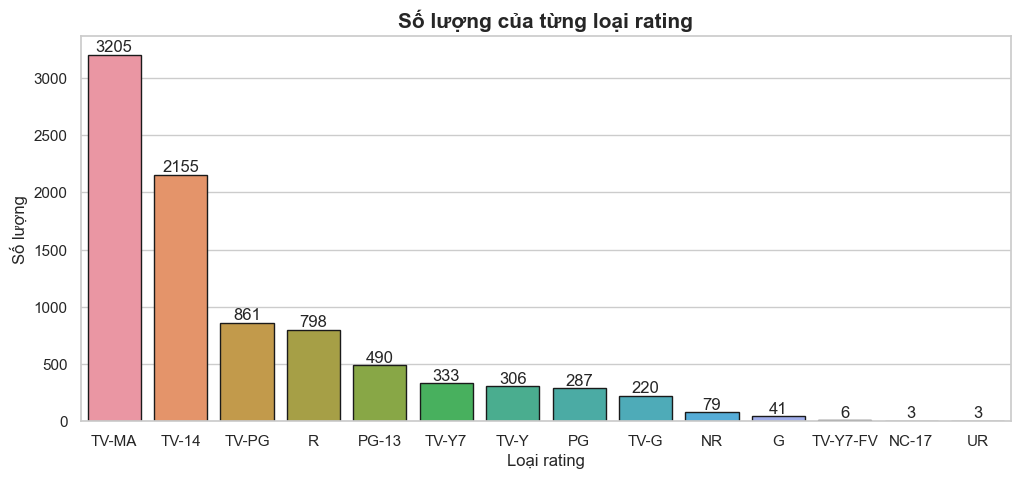

In [220]:
# Biểu đồ phân bố số lượng nội dung theo từng loại rating
plt.figure(figsize=(12, 5))
rating = data['rating'].value_counts()
ax = sns.barplot(x=rating.index, y=rating.values, edgecolor='k',)
plt.title("Số lượng của từng loại rating", fontsize=15, fontweight='heavy')
plt.xlabel("Loại rating", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

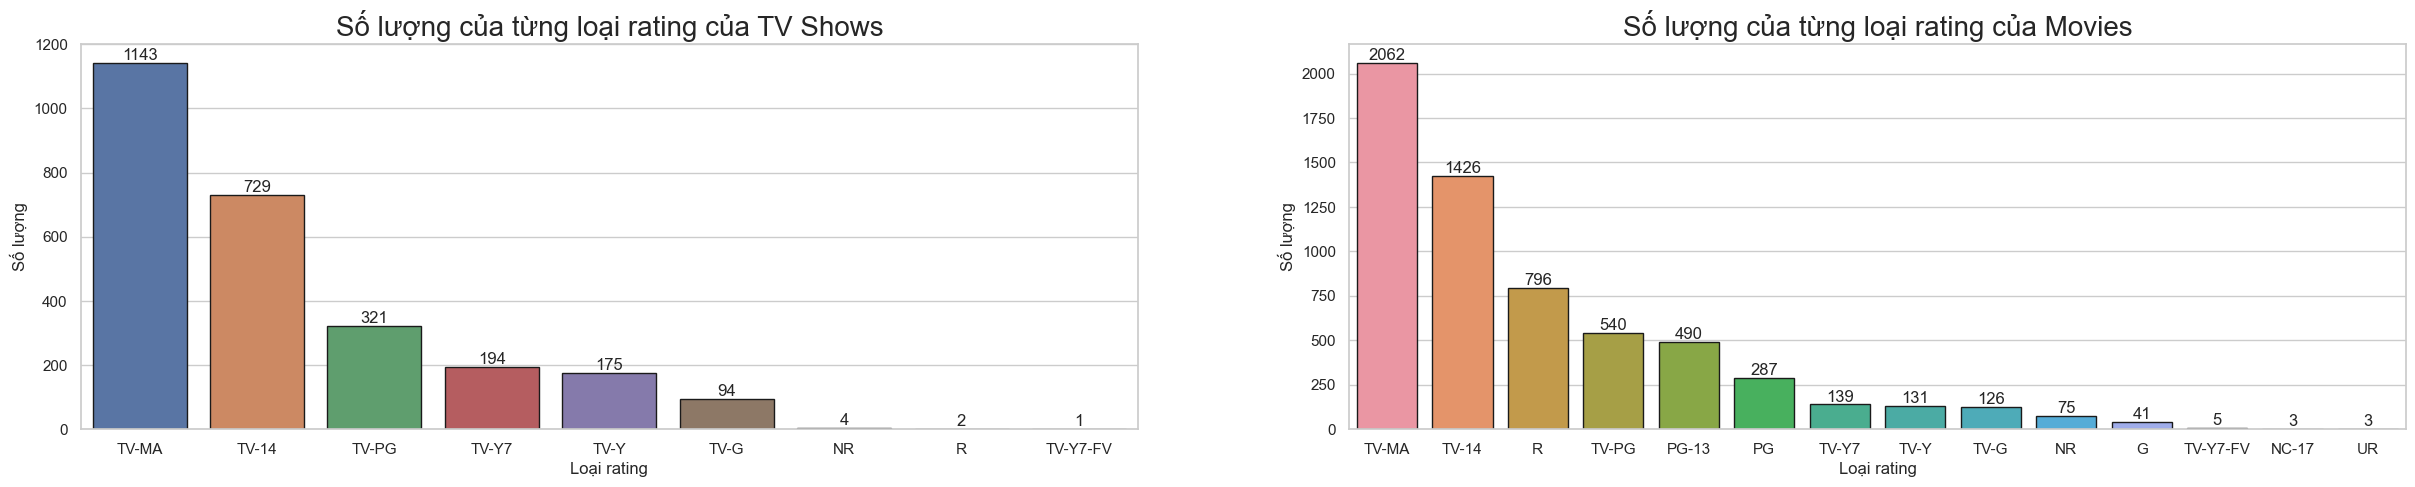

In [222]:
# Biểu đồ phân bố số lượng nội dung theo từng loại rating, theo thể loại
rating_tv = data_tv['rating'].value_counts()
rating_movie = data_movie['rating'].value_counts()


fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(1, 2, 1)
sns.barplot(x=rating_tv.index, y=rating_tv.values, edgecolor='k', ax=ax)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Loại rating", fontsize=12)
ax.set_ylabel("Số lượng", fontsize=12)
plt.title("Số lượng của từng loại rating của TV Shows", fontsize=20)


ax = fig.add_subplot(1, 2, 2)
sns.barplot(x=rating_movie.index, y=rating_movie.values, edgecolor='k', ax=ax)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Loại rating", fontsize=12)
ax.set_ylabel("Số lượng", fontsize=12)
plt.title("Số lượng của từng loại rating của Movies", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Số lượng nội dung TV-MA được phát hành từ 2008 đến 2021')

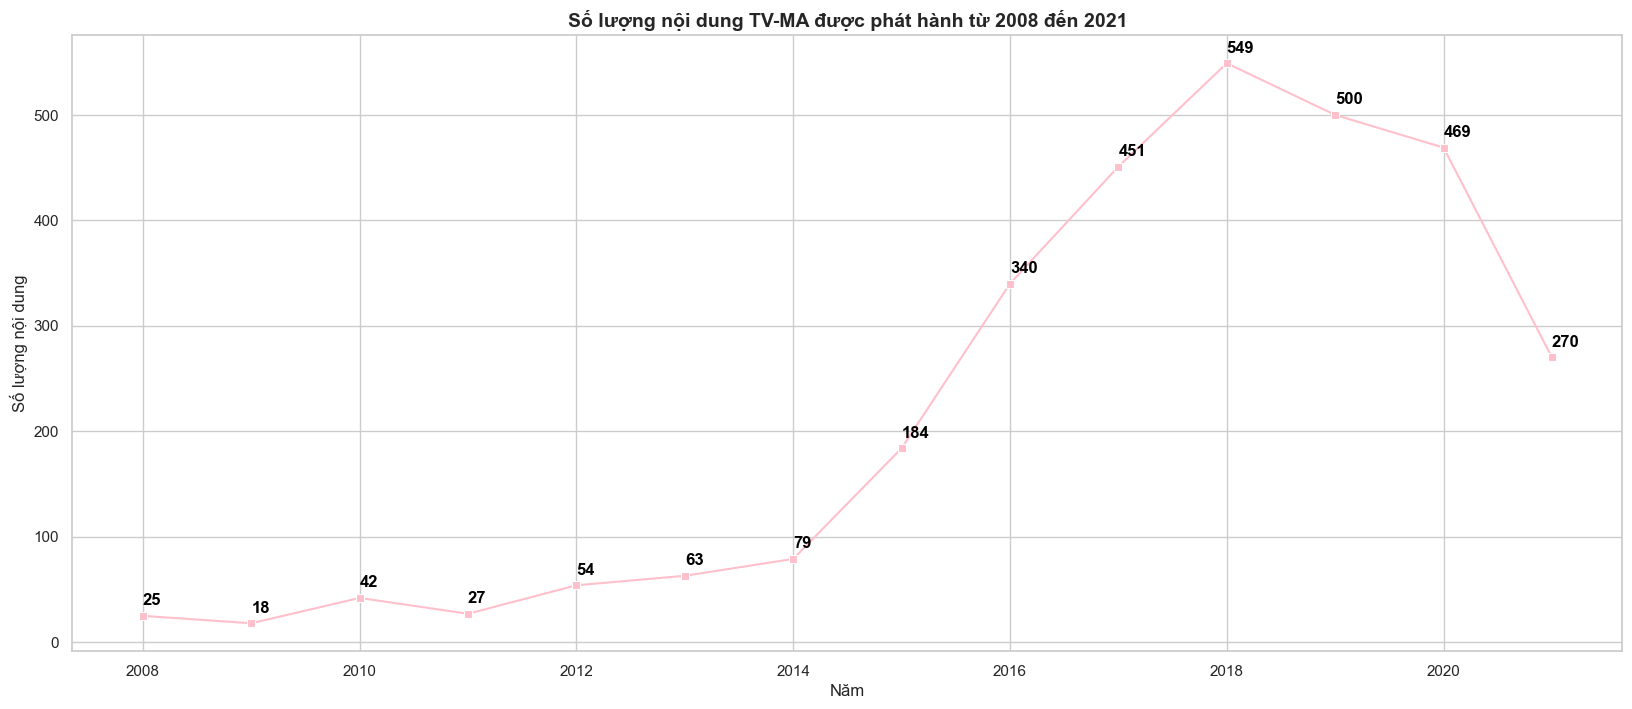

In [223]:
# Phân tích số lượng TV-MA theo năm (từ 2018 đến 2021)
fr08to21 = data[(data['release_year'] >= 2008) & (data['release_year'] <= 2021)]
tvma = fr08to21[fr08to21['rating'] == 'TV-MA']['release_year'].value_counts()
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x=tvma.index, y=tvma.values, alpha=1, color="pink", marker='s')
for i, v in enumerate(tvma.sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='black', fontweight='bold')
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng nội dung TV-MA được phát hành từ 2008 đến 2021', fontsize=14, fontweight='heavy')

Text(0.5, 1.0, 'Top 10 quốc gia phát hành nhiều nội dung TV-MA nhất')

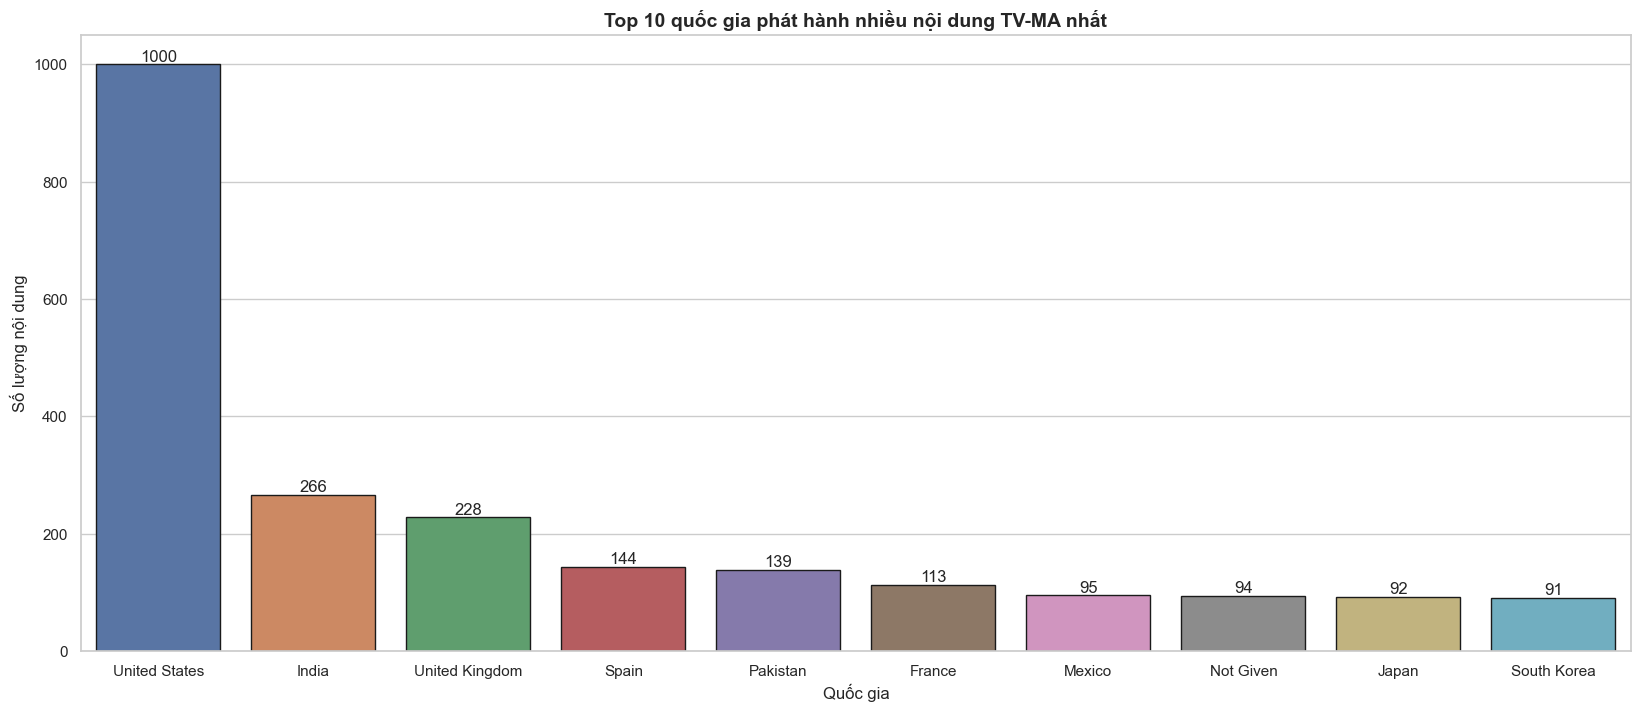

In [224]:
# Phân tích số lượng TV-MA của các nước
plt.figure(figsize=(20, 8))
top10_tvma_country = data[data['rating'] == 'TV-MA']['country'].value_counts().head(10)
ax = sns.barplot(x=top10_tvma_country.index, y=top10_tvma_country.values, edgecolor='k')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Quốc gia", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Top 10 quốc gia phát hành nhiều nội dung TV-MA nhất', fontsize=14, fontweight='heavy')


Text(0.5, 1.0, 'Số lượng nội dung TV-MA do Mỹ sản xuất theo từng năm')

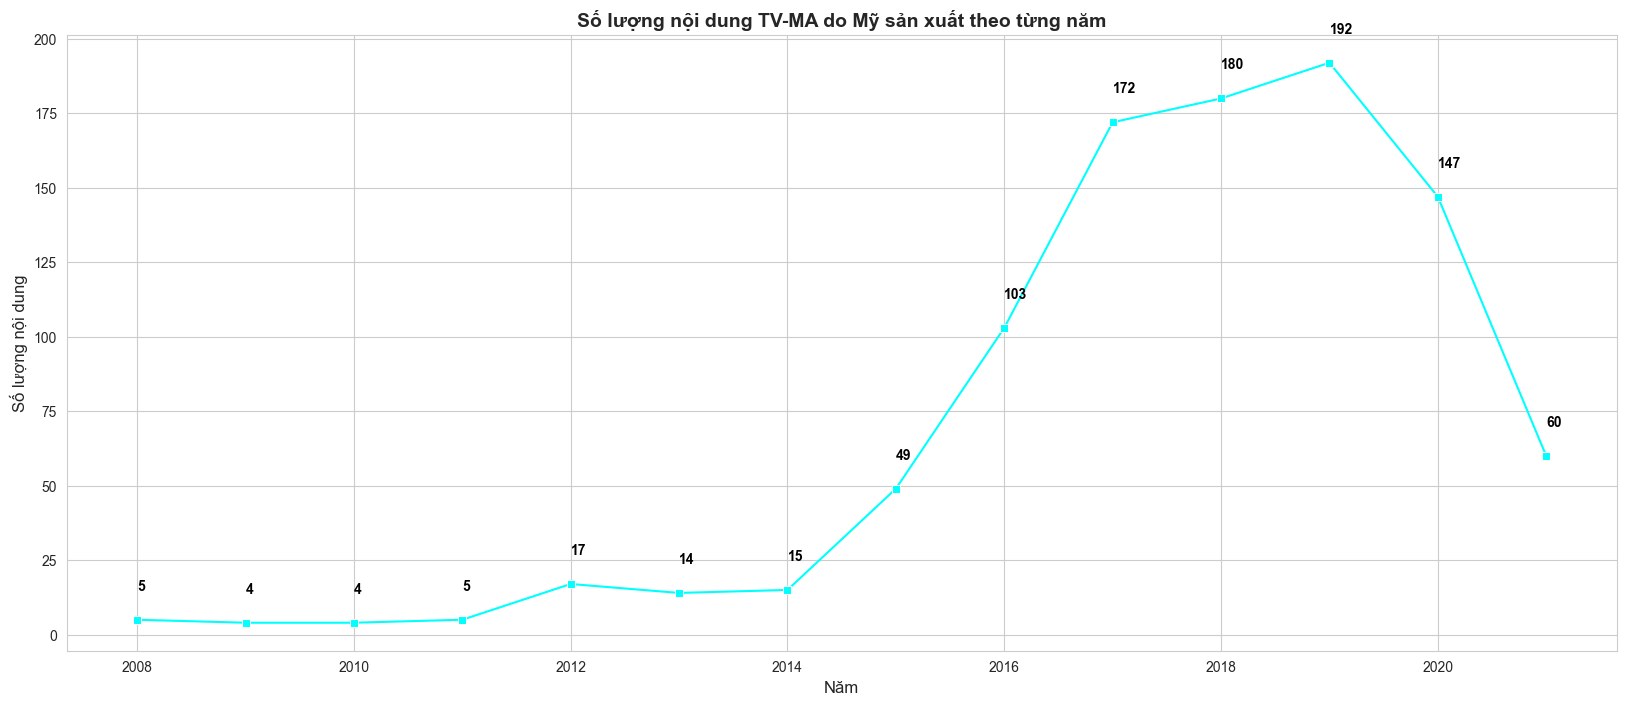

In [112]:
# Phân tích số lượng TV-MA do Mỹ phát hành từ 2008 đến 2021
fr08to21 = data[(data['release_year'] >= 2008) &
                (data['release_year'] <= 2021)]

usa_tvma = fr08to21[(fr08to21['rating'] == 'TV-MA') & (fr08to21['country'] == 'United States')]['release_year'].value_counts()

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x=usa_tvma.index, y=usa_tvma.values, alpha=1, color="cyan", marker='s')
for i, v in enumerate(usa_tvma.sort_index().values):
    plt.text(i + 2008, v + 10, str(v), color='black', fontweight='bold')
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng nội dung", fontsize=12)
plt.title('Số lượng nội dung TV-MA do Mỹ sản xuất theo từng năm', fontsize=14, fontweight='heavy')

Nhận xét:
- Trong bộ dữ liệu có tổng cộng 14 loại rating, rating ở đây là maturity rating (độ tuổi phù hợp để xem nội dung)
- 3 loại rating phổ biến nhất là TV-MA, TV-14 và TV-PG. Trong đó, số lượng nội dung có rating TV-MA là nhiều nhất (tổng cộng 3205 nội dung)
- Số lượng nội dung có rating TV-MA tăng đều từ năm 2008 và đạt đỉnh ở năm 2018 với 549 nội dung và sau đó thì bắt đầu giảm dần
- Mỹ và Ấn Độ là hai quốc gia có số lượng nội dung có rating TV-MA nhiều nhất (tương ứng 1000 và 266 nội dung).
- Số lượng nội dung có rating TV-MA do Mỹ sản xuất có cùng xu hướng với số lượng nội dung có rating TV-MA được thêm vào Netflix.

### **Phân tích cột thể loại nội dung trên Netflix**

In [113]:
# Phân tích cột listed_in
print("Số tổ hợp thể loại: " + str(data['listed_in'].nunique()))

Số tổ hợp thể loại: 513


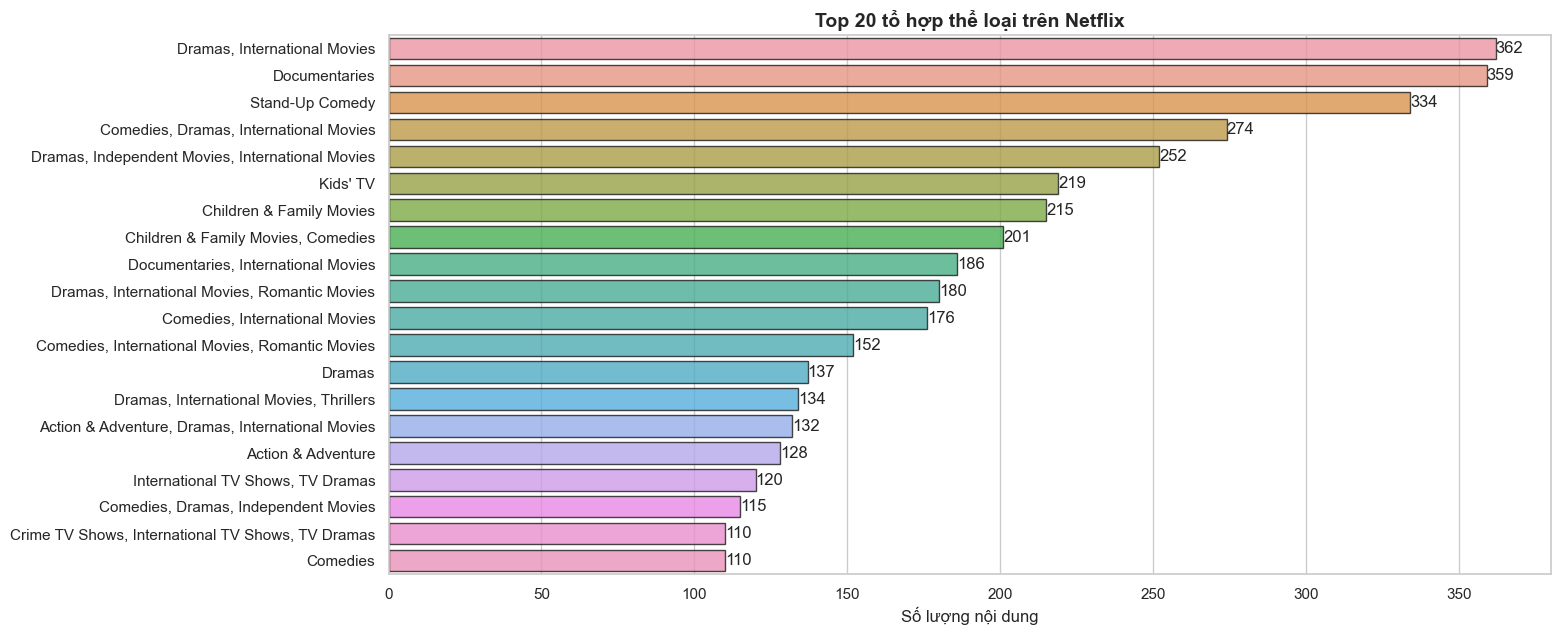

In [225]:
# 20 thể loại nội dung tổng hợp trên Netflix có số lượng nhiều nhất
plt.figure(figsize=(15, 7))
top_20 = data['listed_in'].value_counts().head(20)
ax = sns.barplot(x=top_20.values, y=top_20.index,
            edgecolor='k', linewidth=1, alpha=0.8)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 20 tổ hợp thể loại trên Netflix", fontsize=14, fontweight='heavy')
for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Top 20 tổ hợp thể loại của TV Shows')

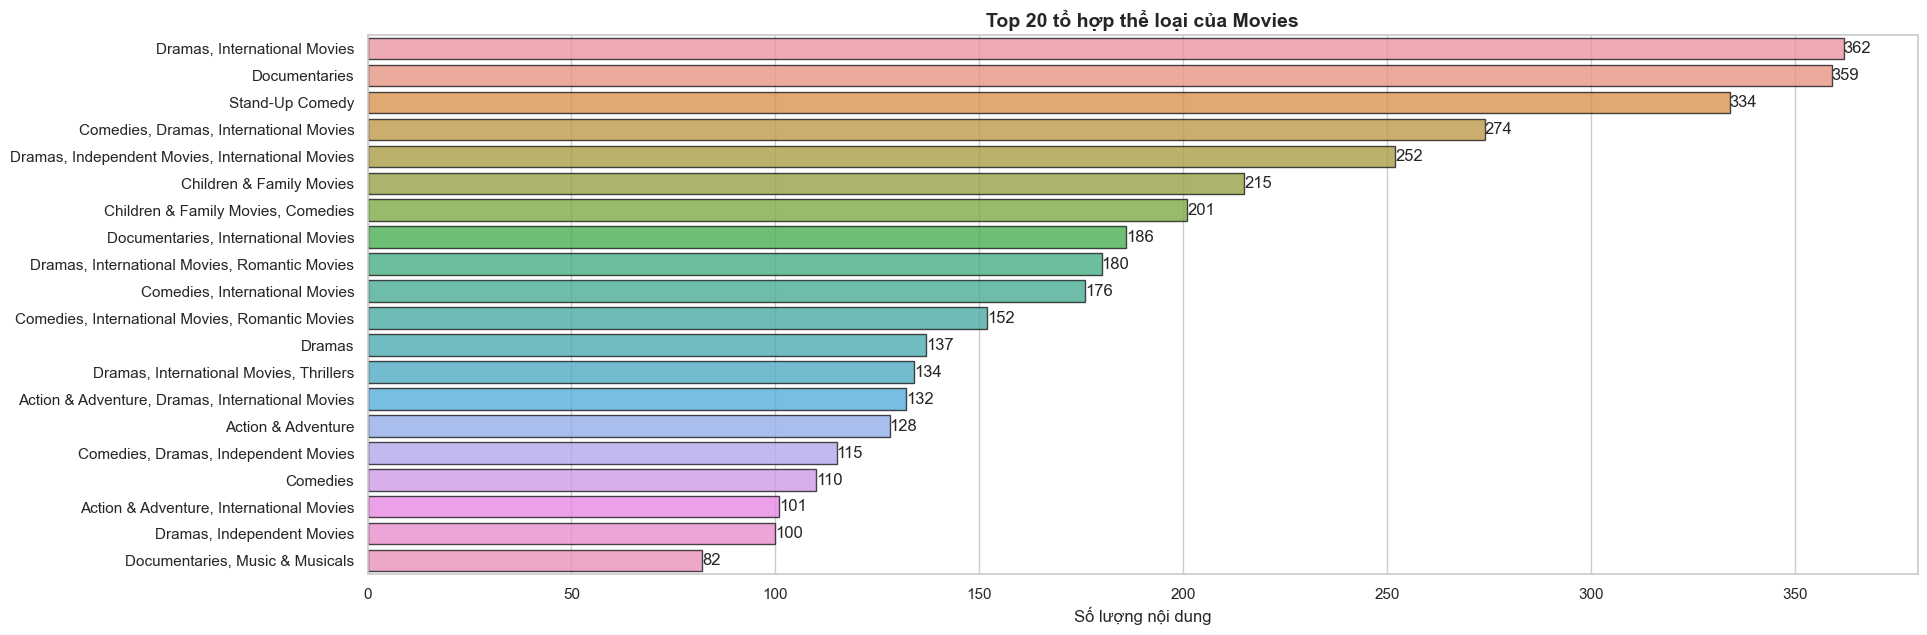

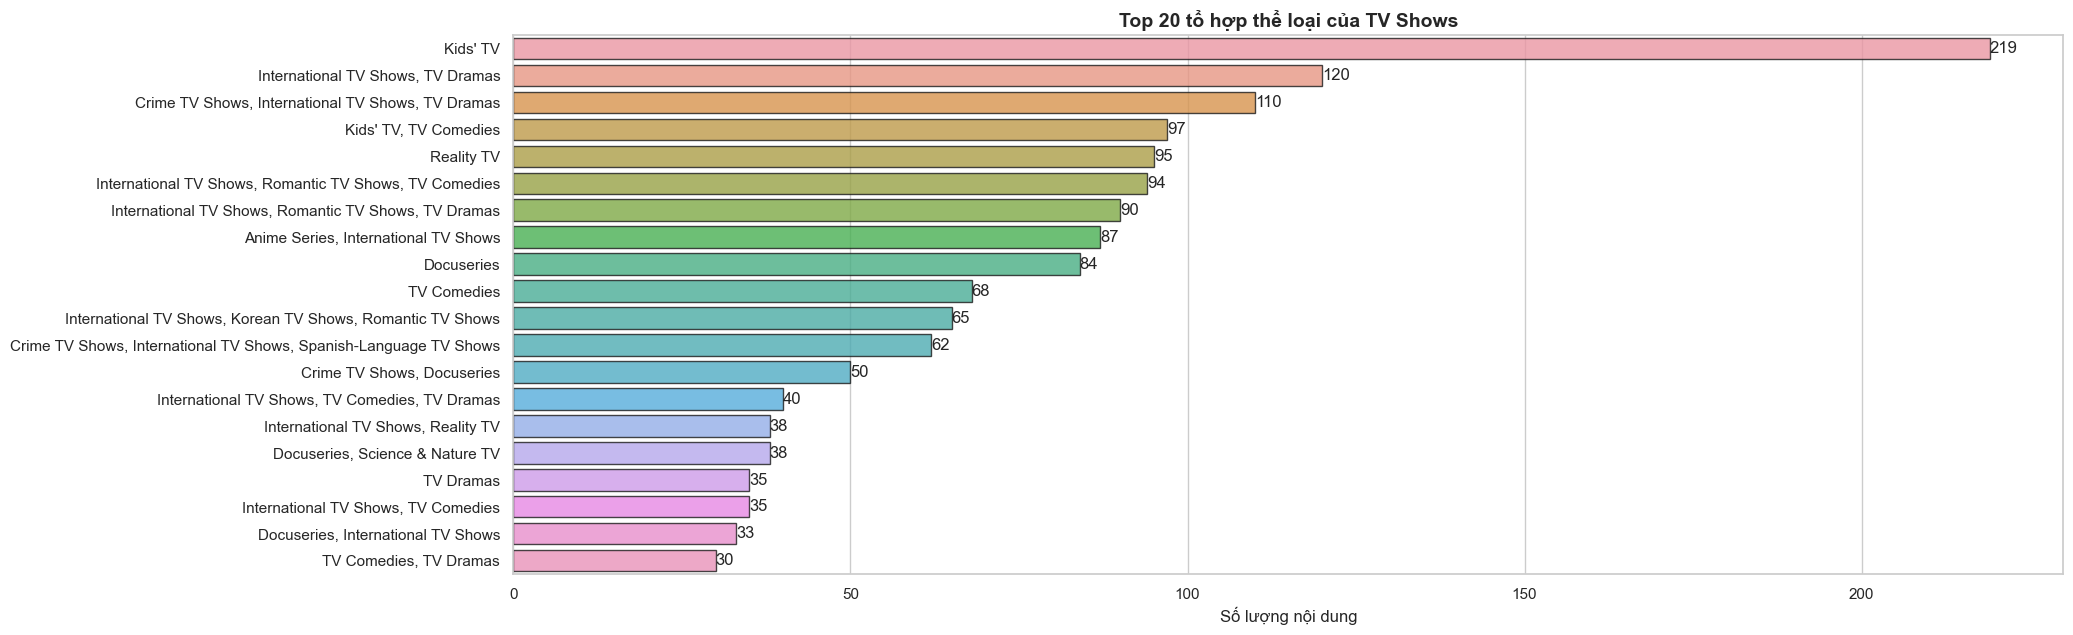

In [226]:
# Top 20 tổ hợp thể loại của TV Shows và Movies
plt.figure(figsize=(20, 7))
top_20 = data_movie['listed_in'].value_counts().head(20)
ax = sns.barplot(x=top_20.values, y=top_20.index,
            edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 20 tổ hợp thể loại của Movies", fontsize=14, fontweight='heavy')

plt.figure(figsize=(20, 7))
top_20 = data_tv['listed_in'].value_counts().head(20)
ax = sns.barplot(x=top_20.values, y=top_20.index,
            edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 20 tổ hợp thể loại của TV Shows", fontsize=14, fontweight='heavy')


In [227]:
# Thể loại đơn lẻ
arr1 = data['listed_in1'].unique()
arr2 = data['listed_in2'].unique()
arr3 = data['listed_in3'].unique()
single_category = np.concatenate((arr1, arr2, arr3))
# remove duplicate
single_category = set(single_category)
# remove 0
single_category.remove(0)
# number of single category
print("Số thể loại đơn lẻ: " + str(len(single_category)))
print(single_category)

Số thể loại đơn lẻ: 42
{'International TV Shows', 'Anime Features', 'Action & Adventure', 'British TV Shows', 'Spanish-Language TV Shows', 'TV Dramas', 'Romantic Movies', 'Classic & Cult TV', 'Stand-Up Comedy', 'Comedies', 'Documentaries', 'Korean TV Shows', 'Anime Series', 'TV Mysteries', 'TV Shows', 'Sci-Fi & Fantasy', 'Faith & Spirituality', 'Thrillers', 'Teen TV Shows', 'TV Action & Adventure', 'Cult Movies', 'Dramas', 'Romantic TV Shows', 'International Movies', 'Music & Musicals', 'Stand-Up Comedy & Talk Shows', 'TV Horror', 'Docuseries', 'TV Sci-Fi & Fantasy', 'Sports Movies', 'Independent Movies', 'LGBTQ Movies', 'Crime TV Shows', 'TV Thrillers', 'Horror Movies', 'Movies', 'Reality TV', 'Science & Nature TV', 'Classic Movies', "Kids' TV", 'TV Comedies', 'Children & Family Movies'}


Text(0.5, 1.0, 'Top 20 thể loại (đơn lẻ) phổ biến nhất trên Netflix')

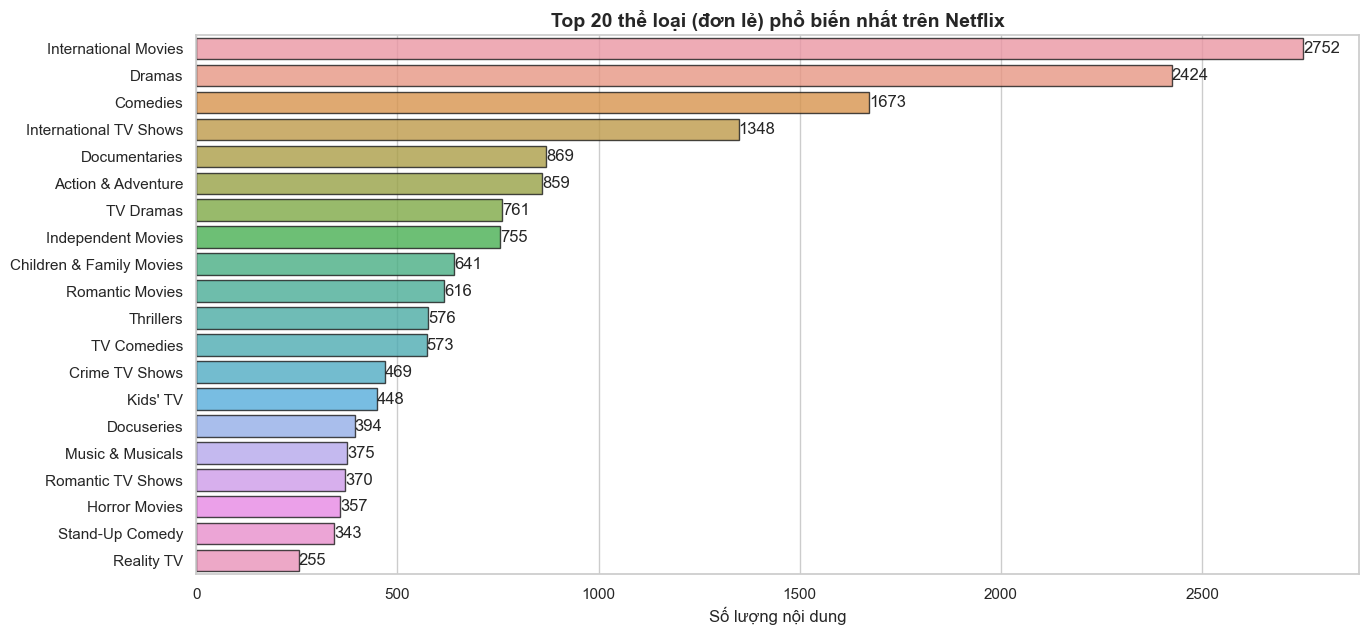

In [228]:
# Plot top 20 thể loại đơn lẻ
single_category_count = {}
for i in single_category:
    single_category_count[i] = data[data['listed_in1'] == i].shape[0] + data[data['listed_in2'] == i].shape[0] + data[data['listed_in3'] == i].shape[0]

scate = pd.DataFrame.from_dict(
    single_category_count, orient='index', columns=['count'])
scate = scate.sort_values(by='count', ascending=False)
sc = scate.head(20)
# plot bar chart of top 20 single categories
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=sc['count'], y=sc.index, edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 20 thể loại (đơn lẻ) phổ biến nhất trên Netflix", fontsize=14, fontweight='heavy')

Text(0.5, 1.0, 'Top 10 quốc gia phát hành nhiều nội dung International Movies nhất')

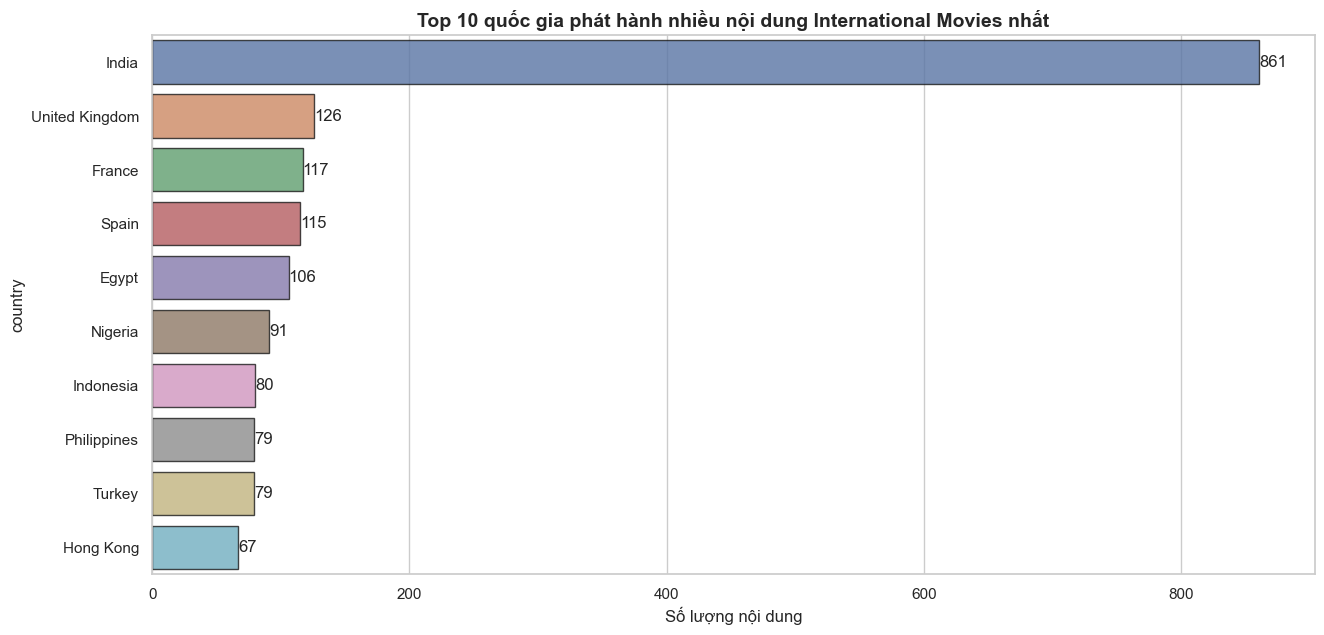

In [229]:
# Top 10 quốc gia phát hành nhiều International Movies nhất
top10_inter = data[(data['listed_in1'] == 'International Movies') | (data['listed_in2'] == 'International Movies') | (data['listed_in3'] == 'International Movies')].value_counts('country').drop('Not Given').head(10)
# plot bar chart of top 10 single categories
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top10_inter.values, y=top10_inter.index, edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 10 quốc gia phát hành nhiều nội dung International Movies nhất", fontsize=14, fontweight='heavy')

Text(0.5, 1.0, 'Top 10 quốc gia phát hành nhiều nội dung Dramas nhất')

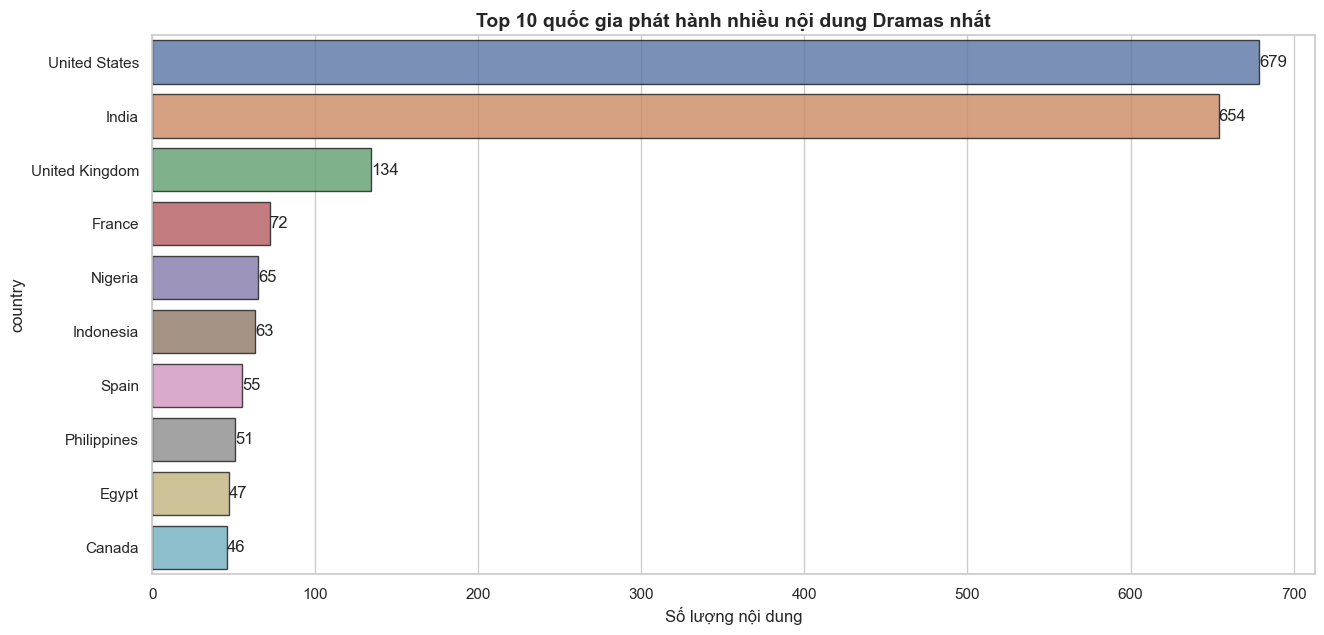

In [230]:
# Top 10 quốc gia phát hành nhiều Dramas nhất
top10_inter = data[(data['listed_in1'] == 'Dramas') | (data['listed_in2'] == 'Dramas') | (
    data['listed_in3'] == 'Dramas')].value_counts('country').drop('Not Given').head(10)
# plot bar chart of top 10 single categories
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top10_inter.values, y=top10_inter.index,
                 edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.title("Top 10 quốc gia phát hành nhiều nội dung Dramas nhất",
          fontsize=14, fontweight='heavy')


Text(0.5, 1.0, 'Top 10 thể loại phim mà Mỹ sản xuất nhiều nhất')

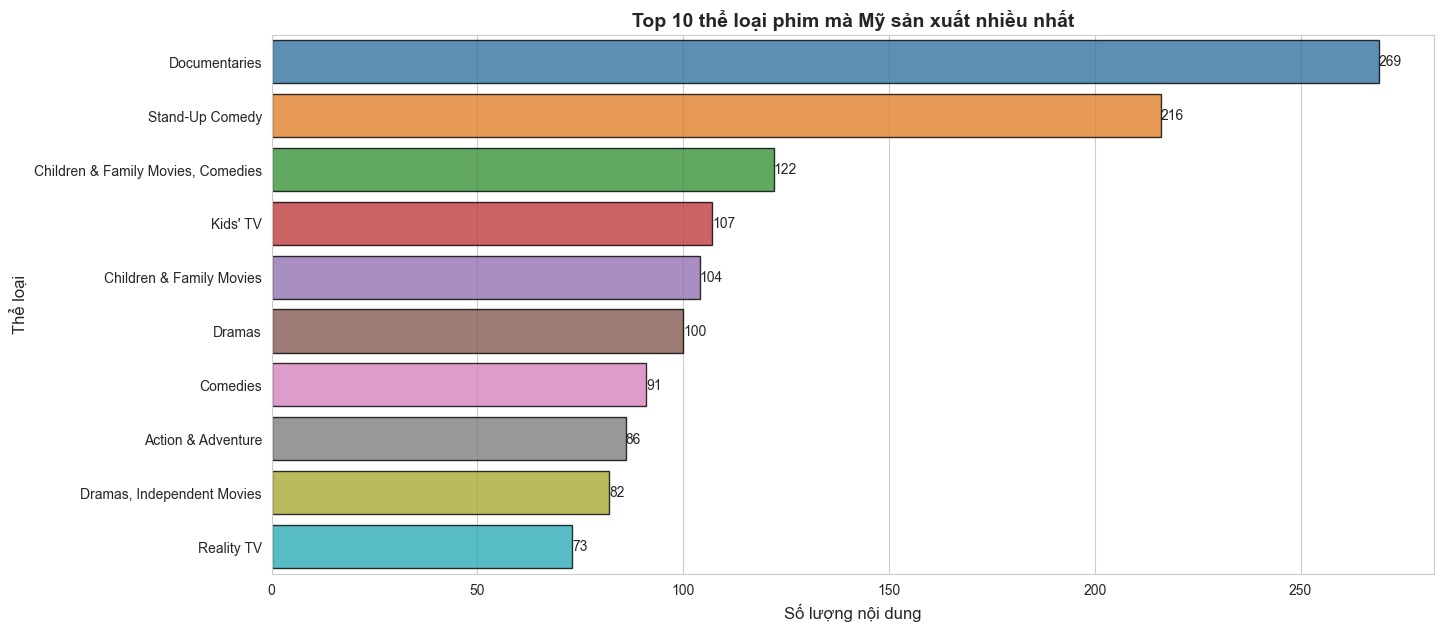

In [140]:
# top 10 thể loại phim mà Mỹ sản xuất nhiều nhất
top10_us = data[(data['country'] == 'United States')].value_counts('listed_in').head(10)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top10_us.values, y=top10_us.index, edgecolor='k', linewidth=1, alpha=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Số lượng nội dung", fontsize=12)
plt.ylabel("Thể loại", fontsize=12)
plt.title("Top 10 thể loại phim mà Mỹ sản xuất nhiều nhất", fontsize=14, fontweight='heavy')


Nhận xét:


### **Phân tích cột duration, duration_seasons, duration_mins**

Text(0.5, 1.0, 'Biểu đồ phân bố của số seasons của TV Shows (2008 - 2021)')

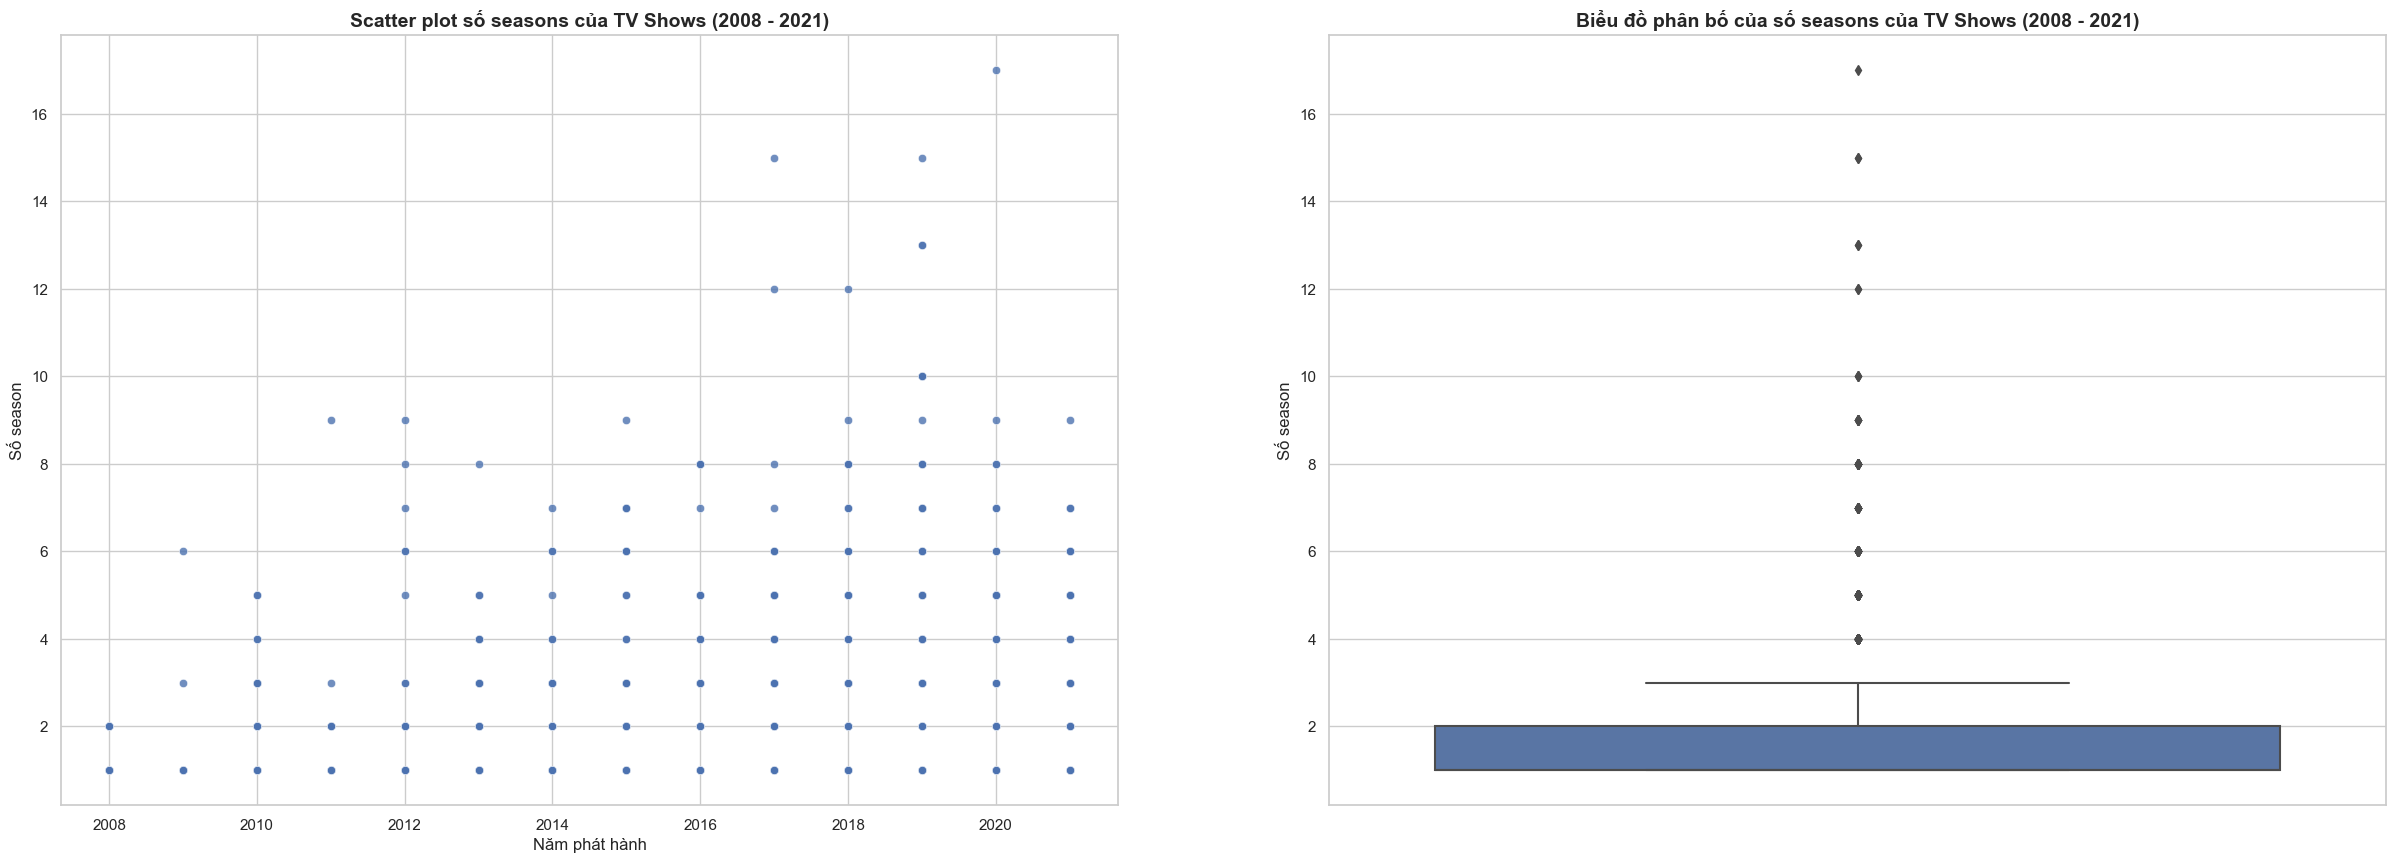

In [232]:
# Phân tích thời lượng của TV Shows được phát hành từ 2008 đến 2021
dur_ss = data_tv[(data_tv['release_year'] >= 2008)
                     & (data_tv['release_year'] <= 2021)]
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 2, 1)
ax = sns.scatterplot(x=dur_ss['release_year'],
                     y=dur_ss['duration_seasons'], alpha=0.8)
ax.set_title("Scatter plot số seasons của TV Shows (2008 - 2021)", fontsize=14, fontweight='heavy')
ax.set_xlabel("Năm phát hành", fontsize=12)
ax.set_ylabel("Số season", fontsize=12)
# ax = sns.boxplot(x=dur_ss['release_year'], y=dur_ss['duration_seasons'])
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(y=dur_ss['duration_seasons'])
ax.set_ylabel("Số season", fontsize=12)
ax.set_title("Biểu đồ phân bố của số seasons của TV Shows (2008 - 2021)",
             fontsize=14, fontweight='heavy')


Text(0.5, 1.0, 'Biểu đồ phân bố của thời lượng của Movies (2008 - 2021)')

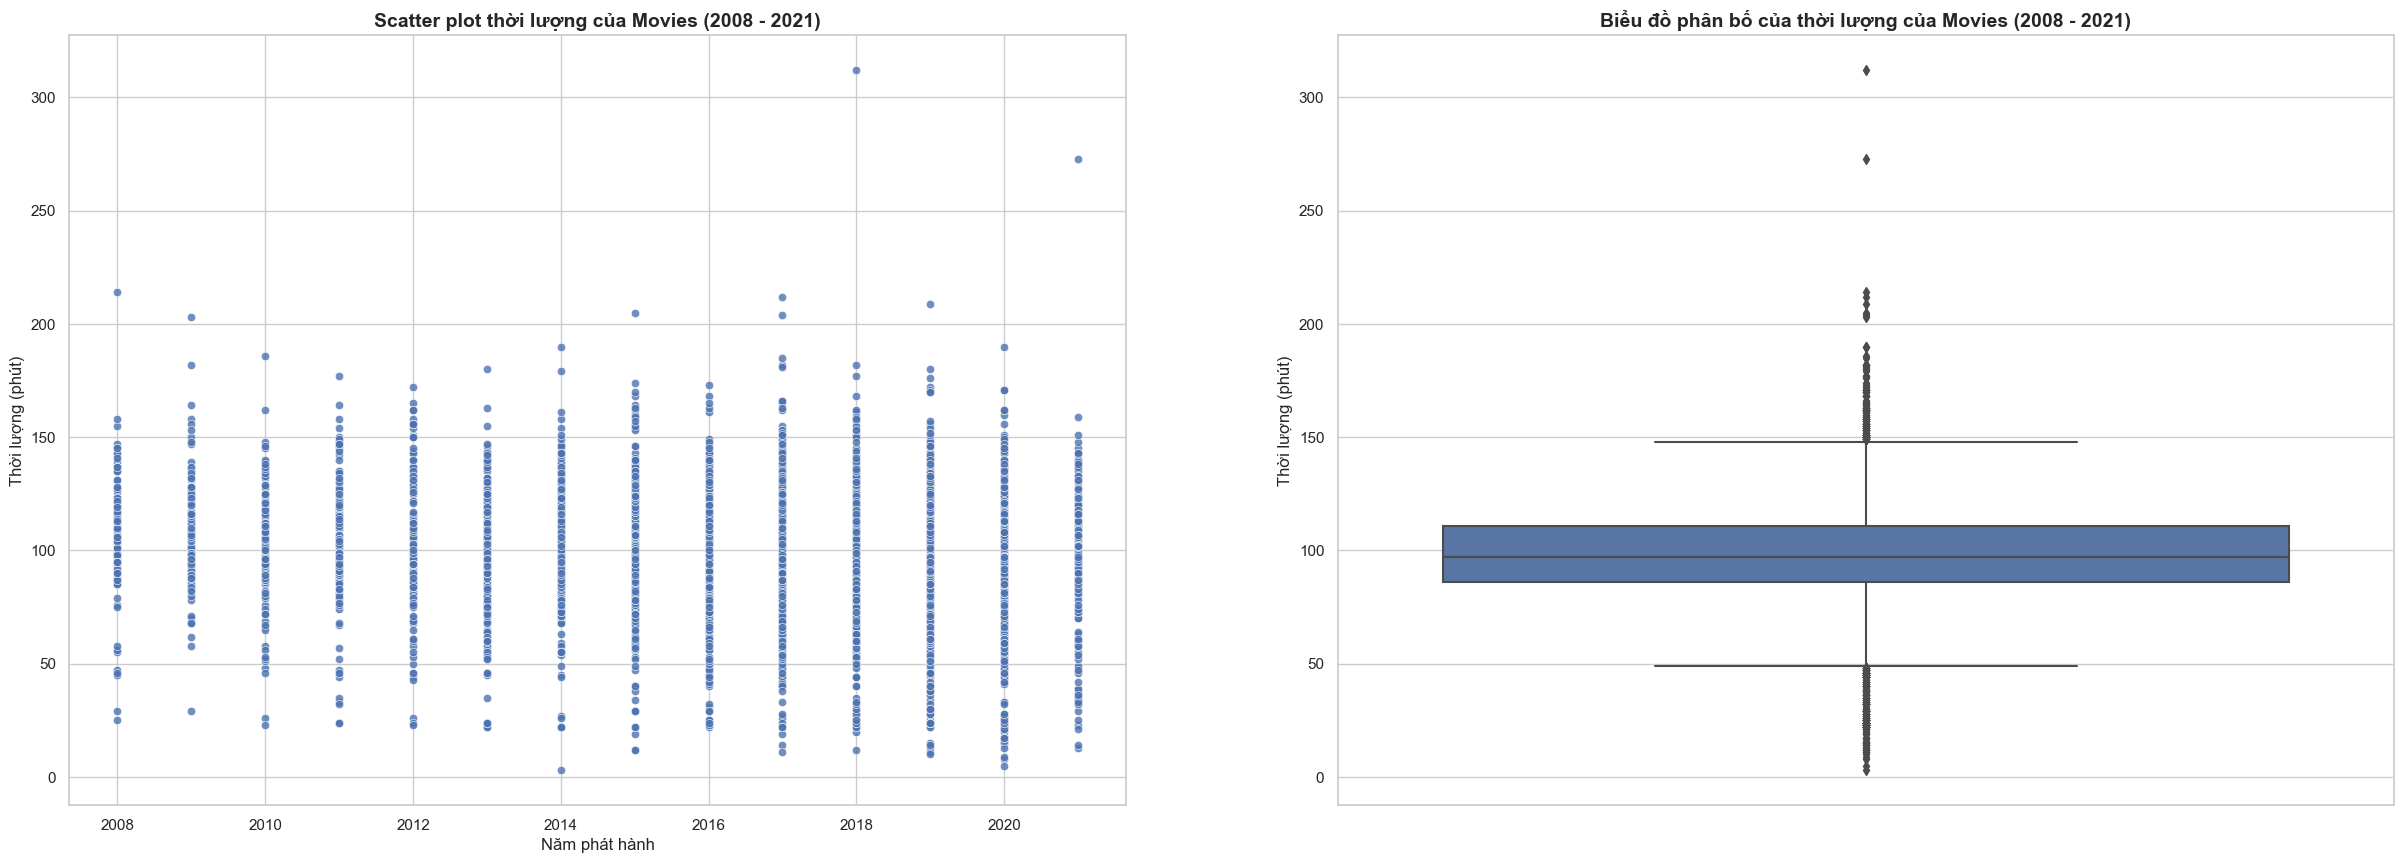

In [234]:
# Phân tích thời lượng của Movies được phát hành từ 2008 đến 2021
dur_min = data_movie[(data_movie['release_year'] >= 2008) & (data_movie['release_year'] <= 2021)]
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 2, 1)
ax = sns.scatterplot(x=dur_min['release_year'], y=dur_min['duration_minutes'], alpha=0.8)
ax.set_title("Scatter plot thời lượng của Movies (2008 - 2021)", fontsize=14, fontweight='heavy')
ax.set_xlabel("Năm phát hành", fontsize=12)
ax.set_ylabel("Thời lượng (phút)", fontsize=12)
# ax = sns.boxplot(x=dur_min['release_year'], y=dur_min['duration_minutes'])
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(y = dur_min['duration_minutes'])
ax.set_ylabel("Thời lượng (phút)", fontsize=12)
ax.set_title("Biểu đồ phân bố của thời lượng của Movies (2008 - 2021)", fontsize=14, fontweight='heavy')


Text(0.5, 1.0, 'Biểu đồ phân bố độ dài phim do Ấn Độ sản xuất')

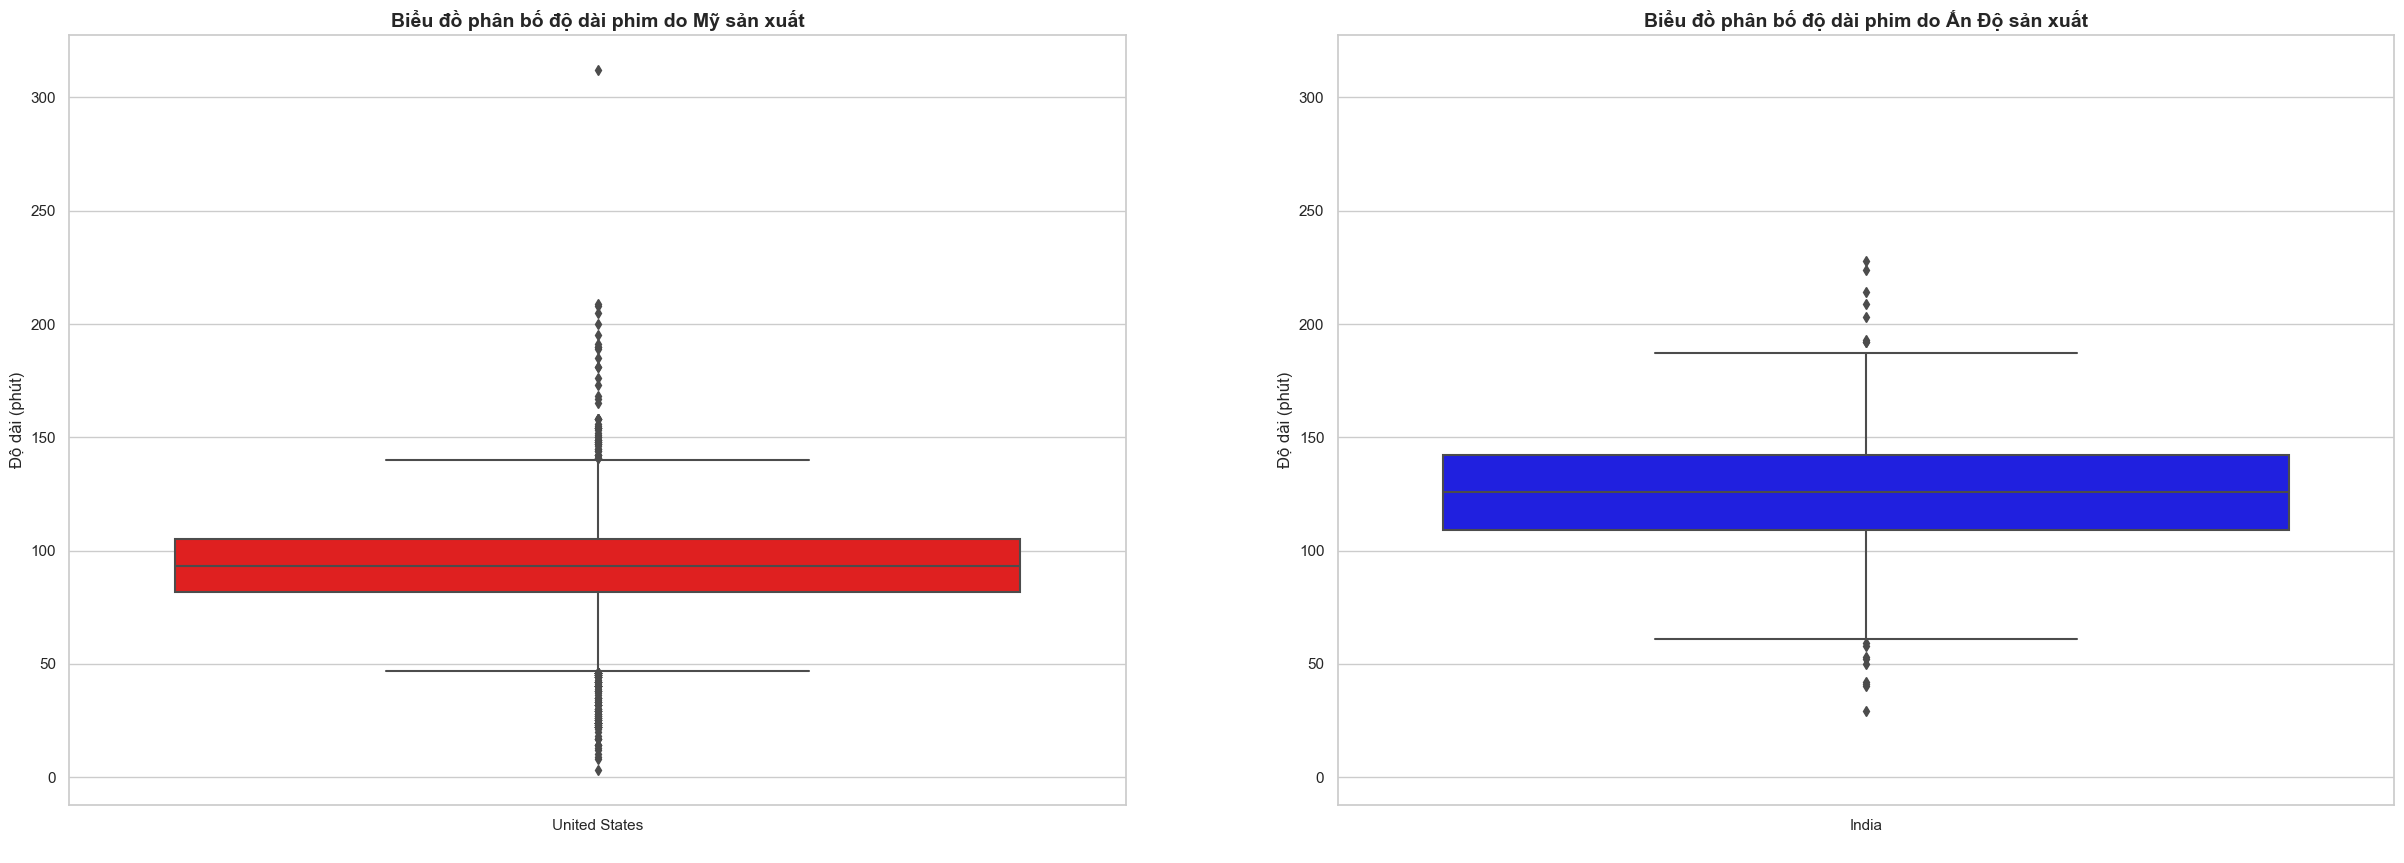

In [235]:
# So sánh độ dài phim do Mỹ sản xuất và Ấn Độ sản xuất
# get data of US and India
data_us = data_movie[data_movie['country'] == 'United States']
data_india = data_movie[data_movie['country'] == 'India']
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(x=data_us['country'], y=data_us['duration_minutes'],  color='red')
ax1.set_xlabel(" ")
ax1.set_ylabel("Độ dài (phút)", fontsize=12)
ax1.set_title("Biểu đồ phân bố độ dài phim do Mỹ sản xuất", fontsize=14, fontweight='heavy')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(x=data_india['country'], y=data_india['duration_minutes'],  color='blue')
# make y axis equal to the first subplot y axis
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel(" ")
ax2.set_ylabel("Độ dài (phút)", fontsize=12)
ax2.set_title("Biểu đồ phân bố độ dài phim do Ấn Độ sản xuất", fontsize=14, fontweight='heavy')



Nhận xét:

## **c. Tổng kết**

### **Dataset bao gồm 10 cột (10 columns), cụ thể như sau:**
* **show_id (object)** - ID của show

* **type (object)** - Loại show
    * Movie
    * TV Show
* **director (object)** - Đạo diễn của show
* **country (object)** - Quốc gia sản xuất show
* **date_added (datetime)** - Ngày được thêm trên Netflix
* **release_year (int 64)** - Năm sản xuất
* **rating (object)** - Loại đáng giá ??
* **duration (object)** - Thời lượng. Có hai đơn vị là:
    * min - phút: đối với Movie
    * Season - mùa: đối với TV Show
* **listed_in (object)** - Thể loại film

> ### *Dataset bao gồm 10 thông tin của 8790 nội dung được thêm vào Netflix từ năm 2008 đến năm 2021. Nội dung cũ nhất đã được sản xuất vào năm 1925 và nội dung mới nhất được sản xuất vào năm 2021. Ở đây nội dung (content) bao gồm TV Show (Chương trình truyền hình) và Movie (phim)*

# **3. Kết luận chung** 
---

Đã trả lời được những câu hỏi sau

<hr>
<center>
**CẢM ƠN THẦY VÀ CÁC BẠN SINH VIÊN ĐÃ CHÚ Ý LẮNG NGHE** <br>
<img src="https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/MD_Mohammed_Dilshan/phpn38AmO.gif">
</center>
